<span style="color: blue; font-size: 20px; font-weight: bold;">Комментарий ревьюера</span>

<span style="color: blue">Привет, Николай! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</span>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u>⤵</summary>
<span style="color: blue">Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</span>


---


<span style="color: blue">синий текст - просто текст комментария</span>

<span style="color: green">✔️ и зеленый текст - все отлично</span>

<span style="color: orange">⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</span>

<span style="color: red">❌ и красный текст - есть недочеты</span>


</details>    
</br>
<span style="color: blue">Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное.</span>

<span style="color: blue">Ответы на мои комментарии лучше тоже помечать.<br>
Например: </span><br><span style="color: purple; font-weight: bold">Комментарий студента</span>

<span style="color: blue; font-weight: bold;">Давай смотреть, что получилось!</span>

<span style="color: purple; font-weight: bold">Привет, Павел! Очень приятно!</span>

# Проект прогнозирование снижения покупательской активности пользователей онлайн-магазина

Интернет-магазин "Один клик" испытывает проблемы со снижением покупательской активности клиентов. При этом возможности по привлечению новых клиентов ограничены, поэтому выходом является увеличение активности постоянных клиентов. Для этого нужно узнать, какие факторы снижения покупательской активности существуют в случае данного магазина, чтобы учитывая их формировать персональные предложения для покупателей. У нас есть данные о поведении покупателей: (1) признаки, описывающие маркетинговую коммуникацию компании с клиентом, (2) признаки, описывающие продуктовое поведение покупателя, (3) признаки, описывающие денежные затраты клиентов, (4) признаки, описывающие поведение покупателей на сайте. Исходя из этого, построим анализ следующим образом:
1. Загрузить данные
2. Предобработать данные - избавить их от дубликатов и пропущенных значений, а также привести данные к стандартному виду
3. Исследовательский анализ данных - оценить распределение признаков и их пригодность для дальнейшего анализа
4. Корреляционный анализ - оценить взаимосвязи в данных, чтобы понять перспективные данные для моделирования, а также проверить входные признаки на коллинеарность
5. Построение моделей для прогноза снижения покупательской активности клиентов на основе входных признаков, выделенных в предыдущих этапах, и объяснение, какие признаки являются наиболее важными для данной модели.
6. На основе полученных моделей проанализировать сегмент покупателей, которые покупают преимущественно акционные товары и дать по ним рекомендации по активности с ними.

Это сочетание позволило избавиться от ошибок shap и seaborn:

In [83]:
!pip install phik

     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01
  Using cached numpy-1.26.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
     |████████████████████████████████| 17.3 MB 80.4 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.0 requires numpy<1.23,>=1.18, but you have numpy 1.24.4 which is incompatible.


In [1]:
!pip install matplotlib==3.7.3
!pip install shap

     |████████████████████████████████| 11.6 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 321 kB 95.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 93.0 MB/s eta 0:00:01
     |████████████████████████████████| 18.2 MB 63.4 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.4 which is incompatible.
numba 0.56.0 requires numpy<1.23,>=1.18, but you have numpy 1.26.4 which is incompatible.
     |████████████████████████████████| 539 kB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from phik.report import plot_correlation_matrix
from phik import report

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score

import shap

import warnings
warnings.filterwarnings('ignore')

C:\Users\nikol\anaconda3\lib\site-packages\seaborn\utils.py:10: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.1)
  from scipy import stats


ImportError: Numba needs NumPy 1.20 or less

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

## Загрузка данных

Загрузим данные, которые будем анализировать:

In [3]:
market_data = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=";", decimal=",")

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

Посмотрим на датасеты. Для этого создадим функцию, которая отображает информацию и выводит первые несколько строк датафрейма:

In [4]:
def show_data(df):
    display(df.head())
    df.info()

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Метод info выведет информацию и без display, display, в данном случае, печатает только слово None в аутпутах.
</font>

In [5]:
show_data(market_data)

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [6]:
show_data(market_money)

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [7]:
show_data(market_time)

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [8]:
show_data(money)

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Все данные подгрузились правильно. Переименуем названия столбцов в соответствии со стандартами для достижения единообразного вида данных:

In [9]:
market_data = market_data.rename(columns={'Покупательская активность': 'purchase_activity',
                                         'Тип сервиса': 'service_type', 'Разрешить сообщать': 'message_consent',
                                         'Маркет_актив_6_мес': 'market_commun_6', 'Маркет_актив_тек_мес': 'market_commun_1',
                                         'Длительность': 'register_days', 'Акционные_покупки': 'promot_purchases',
                                         'Популярная_категория': 'pop_cat', 
                                         'Средний_просмотр_категорий_за_визит': 'avg_cat_views_visit',
                                         'Неоплаченные_продукты_штук_квартал': 'unpaid_products',
                                         'Ошибка_сервиса': 'service_errors', 'Страниц_за_визит': 'pages_visit'})
market_money = market_money.rename(columns={'Период': 'period', 'Выручка': 'revenue'})
market_time = market_time.rename(columns={'Период': 'period', 'минут': 'time'})
money = money.rename(columns={'Прибыль': 'profit'})

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [10]:
show_data(market_data)

id purchase_activity service_type message_consent  market_commun_6  \
0  215348         Снизилась      премиум              да              3.4   
1  215349         Снизилась      премиум              да              4.4   
2  215350         Снизилась    стандартт             нет              4.9   
3  215351         Снизилась    стандартт              да              3.2   
4  215352         Снизилась    стандартт             нет              5.1   

   market_commun_1  register_days  promot_purchases            pop_cat  \
0                5            121              0.00   Товары для детей   
1                4            819              0.75   Товары для детей   
2                3            539              0.14  Домашний текстиль   
3                5            896              0.99   Товары для детей   
4                3           1064              0.94   Товары для детей   

   avg_cat_views_visit  unpaid_products  service_errors  pages_visit  
0                    6                2               1            5  
1                    4                4               2            5  
2                    5                2               1            5  
3                    5                0               6            4  
4                    3                2               3            2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1300 non-null   int64  
 1   purchase_activity    1300 non-null   object 
 2   service_type         1300 non-null   object 
 3   message_consent      1300 non-null   object 
 4   market_commun_6      1300 non-null   float64
 5   market_commun_1      1300 non-null   int64  
 6   register_days        1300 non-null   int64  
 7   promot_purchases     1300 non-null   float64
 8   pop_cat              1300 non-null   object 
 9   avg_cat_views_visit  1300 non-null   int64  
 10  unpaid_products      1300 non-null   int64  
 11  service_errors       1300 non-null   int64  
 12  pages_visit          1300 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 132.2+ KB


In [11]:
show_data(market_money)

id               period  revenue
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   period   3900 non-null   object 
 2   revenue  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [12]:
show_data(market_time)

id            period  time
0  215348     текущий_месяц    14
1  215348  предыдцщий_месяц    13
2  215349     текущий_месяц    10
3  215349  предыдцщий_месяц    12
4  215350     текущий_месяц    13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   period  2600 non-null   object
 2   time    2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [13]:
show_data(money)

id  profit
0  215348    0.98
1  215349    4.16
2  215350    3.13
3  215351    4.87
4  215352    4.21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1300 non-null   int64  
 1   profit  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Столбцы переименованы успешно. Можно приступать к предобработке данных

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

## Предобработка данных

На этом этапе посмотрим на все таблицы и проверим:
1. Корректность типов данных
2. Наличие дубликатов
3. Наличие пропущенных значений

Если посмотреть на информацию о дата фреймах выше, то видно, что все типы данных проставлены корректно. Поэтому посмотрим на дубликаты. Начнем с явных дубликатов:

In [14]:
market_data.duplicated().sum()

0

In [15]:
market_money.duplicated().sum()

0

In [16]:
market_time.duplicated().sum()

0

In [17]:
money.duplicated().sum()

0

Явных дубликатов в данных не обнаружено. Посмотрим на то, есть ли неявные дубликаты. Для этого, во-первых, посмотрим на варианты значений в текстовых столбцах:

In [18]:
market_data['purchase_activity'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [19]:
market_data['service_type'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

Видим опечатку в одном из названий категорий, исправим ее:

In [20]:
market_data.loc[market_data['service_type'] == 'стандартт', 'service_type'] = 'стандарт'

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [21]:
market_data['service_type'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [22]:
market_data['message_consent'].unique()

array(['да', 'нет'], dtype=object)

In [23]:
market_data['pop_cat'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

В данной таблице исправили ошибку в категории, посмотрим, не появились ли дубликаты еще раз:

In [24]:
market_data.duplicated().sum()

0

Посмотрим аналогично на следующие таблицы:

In [25]:
market_money['period'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [26]:
market_time['period'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

Задвоений категорий нет, но есть опечатка во последней из этих таблиц, исправим ее:

In [27]:
market_time.loc[market_time['period'] == 'предыдцщий_месяц', 'period'] = 'предыдущий_месяц'

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [28]:
market_time['period'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Неявные дубликаты по идее в первой таблице могут быть только в столбце `id`. Посмотрим, есть ли такие дубликаты:

In [29]:
market_data['id'].duplicated().sum()

0

Дубликатов по id нет. В таблицах `market_money` и `market_time` могут быть дубликаты по пересечению столбцов `id` и `period`, проверим, есть ли такие дубликаты:

In [30]:
market_money[['id', 'period']].duplicated().sum()

0

In [31]:
market_time[['id', 'period']].duplicated().sum()

0

Таких дубликатов тоже нет. В последней таблице могут быть дубликаты только по столбцу `id`:

In [32]:
money['id'].duplicated().sum()

0

Здесь тоже нет дубликатов. По итогу анализа дубликатов можно сказать, что их не обнаружено. Посмотрим теперь данные на наличие пропущенных значений:

In [33]:
market_data.isna().sum()

id                     0
purchase_activity      0
service_type           0
message_consent        0
market_commun_6        0
market_commun_1        0
register_days          0
promot_purchases       0
pop_cat                0
avg_cat_views_visit    0
unpaid_products        0
service_errors         0
pages_visit            0
dtype: int64

In [34]:
market_money.isna().sum()

id         0
period     0
revenue    0
dtype: int64

In [35]:
market_time.isna().sum()

id        0
period    0
time      0
dtype: int64

In [36]:
money.isna().sum()

id        0
profit    0
dtype: int64

Ни в одной таблице не найдено пропущенных значений. Таким образом, предобработка данных проведена. Стоит учитывать, что пропущенные значения могут появиться при объединении таблиц в дальнейшем, и нужно будет провести проверку. Теперь можно приступать к исследовательскому анализу данных:

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>Здорово, что не забываешь про промежуточные выводы.</font>

## Исследовательский анализ данных

Посмотрим, как распределены данные в таблицах. Здесь мы посмотрим на одномерные статистики и визуализации. Для количественных показателей мы будем смотреть на сводку статистик и строить гистограмму, а для категориальных - на таблицу распределения и столбчатую или пироговую диаграмму. Поскольку первая таблица самая объемная, то выделим количественные и категориальные показатели в отдельные списки (для числовых уберем столбец `id`):

In [37]:
numeric_cols = market_data.select_dtypes('number').columns.to_list()[1:]
categ_cols = market_data.select_dtypes('object').columns.to_list()

Посмотрим на описательные статистики для числовых столбцов:

In [38]:
market_data[numeric_cols].describe()

market_commun_6  market_commun_1  register_days  promot_purchases  \
count      1300.000000      1300.000000    1300.000000       1300.000000   
mean          4.253769         4.011538     601.898462          0.319808   
std           1.014814         0.696868     249.856289          0.249843   
min           0.900000         3.000000     110.000000          0.000000   
25%           3.700000         4.000000     405.500000          0.170000   
50%           4.200000         4.000000     606.000000          0.240000   
75%           4.900000         4.000000     806.000000          0.300000   
max           6.600000         5.000000    1079.000000          0.990000   

       avg_cat_views_visit  unpaid_products  service_errors  pages_visit  
count           1300.00000      1300.000000     1300.000000  1300.000000  
mean               3.27000         2.840000        4.185385     8.176923  
std                1.35535         1.971451        1.955298     3.978126  
min                1.00000         0.000000        0.000000     1.000000  
25%                2.00000         1.000000        3.000000     5.000000  
50%                3.00000         3.000000        4.000000     8.000000  
75%                4.00000         4.000000        6.000000    11.000000  
max                6.00000        10.000000        9.000000    20.000000

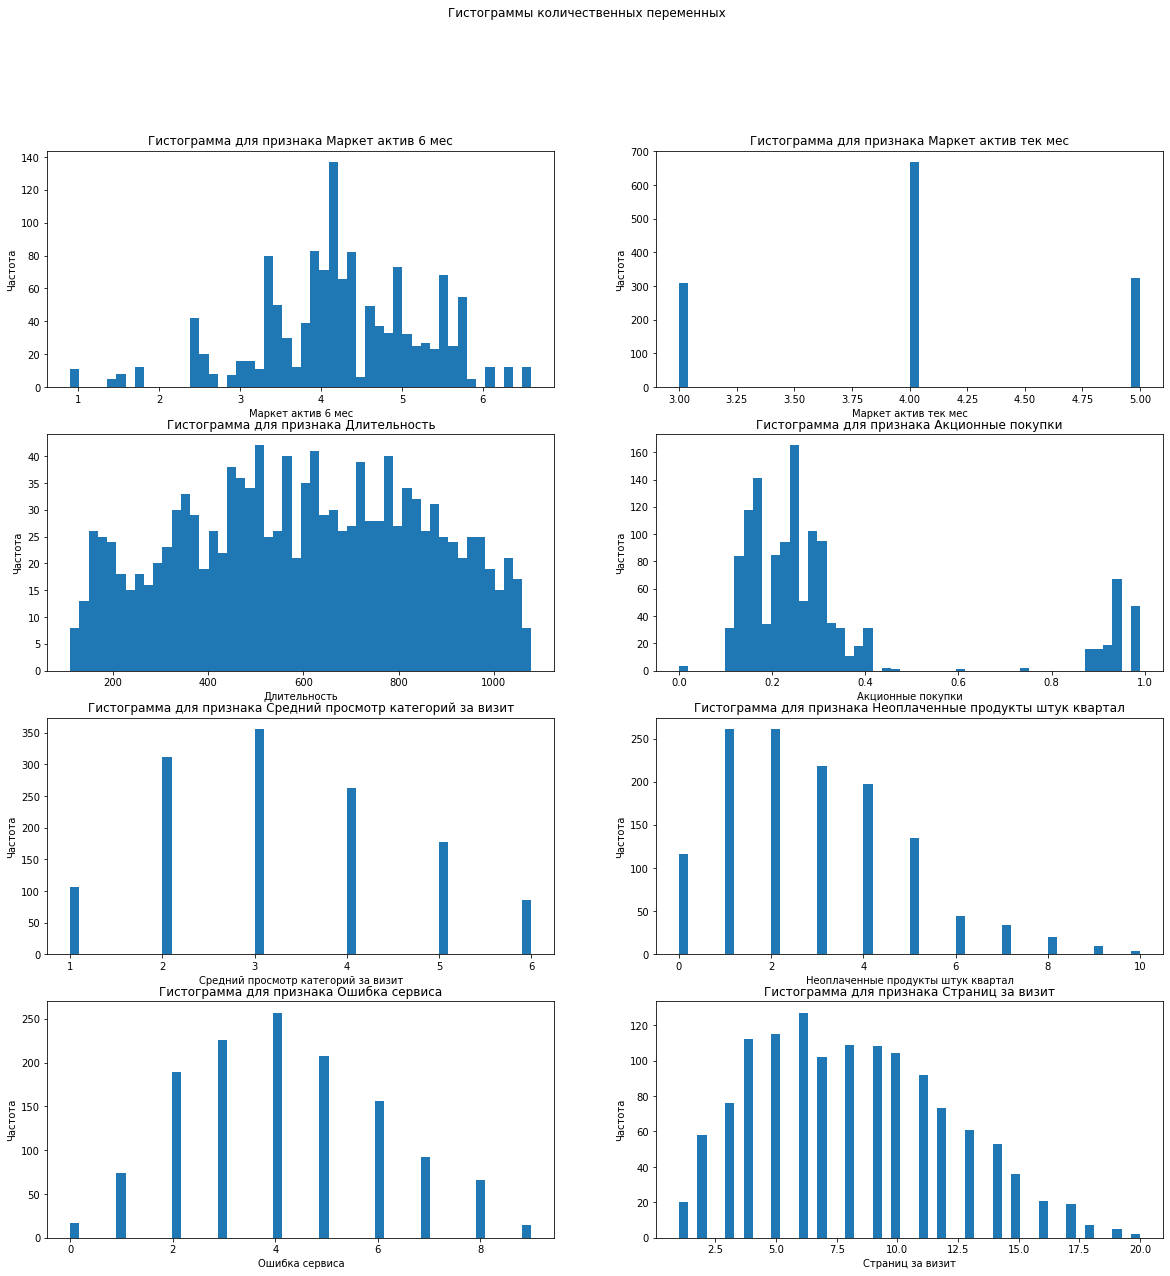

In [39]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
fig.suptitle('Гистограммы количественных переменных')

columns_rus = ['Маркет актив 6 мес', 'Маркет актив тек мес', 'Длительность',
              'Акционные покупки', 'Средний просмотр категорий за визит', 
              'Неоплаченные продукты штук квартал', 'Ошибка сервиса', 'Страниц за визит']

ax = ax.flatten()

for i, col in enumerate(numeric_cols):
    ax[i].hist(market_data[col], bins=50)
    ax[i].set_title(f'Гистограмма для признака {columns_rus[i]}')
    ax[i].set_xlabel(columns_rus[i])
    ax[i].set_ylabel('Частота')

plt.show()

Мы видим, что признаки распределены скорее ненормально, и есть определенные особенности:
1. У признака Маркетинговая активность за 6 мес разброс выше, чем у активности за 1 месяц, у этой переменной наиболее симметричное распределение
2. Признак Маркетинговая активность за 1 мес имеет всего три уникальных значения, поэтому, вероятно, его можно рассматривать, как категориальный признак
3. Признак Акционные покупки имеет основную часть, где доля акционных покупок составляет от 0.1 до 0.4, а также кластер с теми клиентами, которые в основном совершают такие покупки.
4. Дискретные признаки "Средний просмотр категорий", "Неоплаченные продукты", "Ошибки" и "Страниц за визит" имеют колоколообразное немного асимметричное распределение без выраженных выбросов

Посмотрим теперь на категориальные переменные:

In [42]:
for category in categ_cols:
    display(market_data[category].value_counts())

Прежний уровень    802
Снизилась          498
Name: purchase_activity, dtype: int64

стандарт    924
премиум     376
Name: service_type, dtype: int64

да     962
нет    338
Name: message_consent, dtype: int64

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: pop_cat, dtype: int64

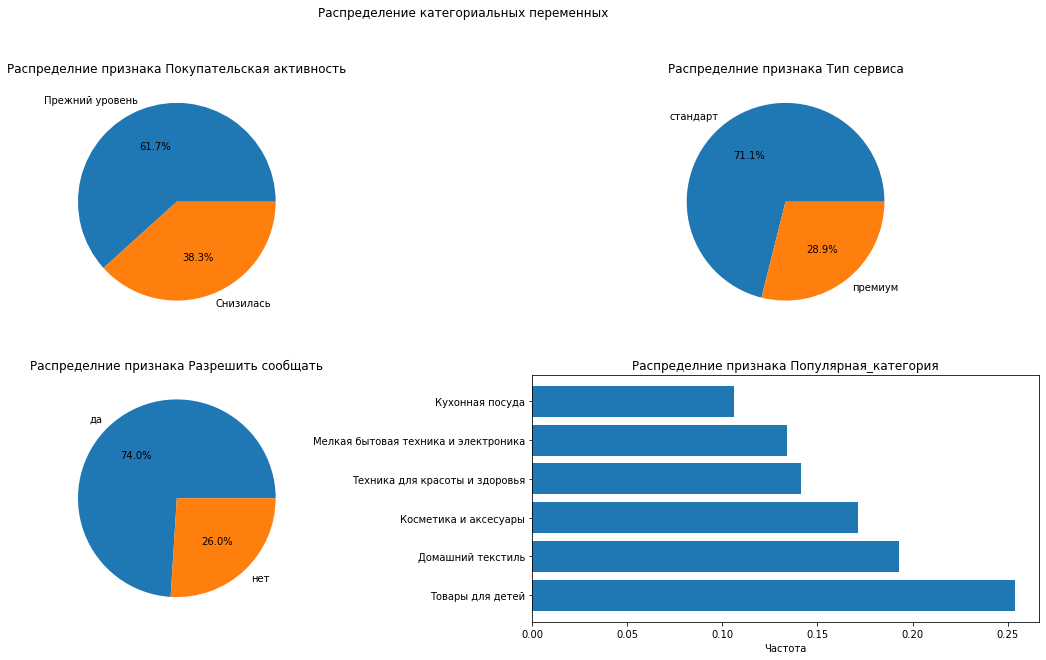

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Распределение категориальных переменных')

columns_rus = ['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
              'Популярная_категория']

ax = ax.flatten()

for i, col in enumerate(categ_cols):
    
    cat_count = market_data[col].value_counts() / market_data.shape[0]
    
    if len(cat_count) == 2:
        ax[i].pie(cat_count, labels=cat_count.index.to_list(), autopct='%1.1f%%')
        ax[i].set_xlabel('')
        ax[i].set_ylabel('')
    elif len(cat_count) > 2:
        ax[i].barh(cat_count.index.to_list(), cat_count, align='center')
        ax[i].set_xlabel('Частота')
        ax[i].set_ylabel('')
    ax[i].set_title(f'Распределние признака {columns_rus[i]}')
    

plt.show()

Мы видим, что во всех признаках, включая целевой - Покупательствую активность, распределение по категориям несбалансированное, однако все категории обладают достаточным количеством данных для дальнейшнего анализа. Посмотрим теперь на распределение признаков в таблицах `market_money` и `market_time`. Поскольку количественные признаки в них измерены для каждого пользователя несколько раз, то посмотрим на распределение этих признаков, сгруппированное по категориальным переменным:

In [44]:
market_money.groupby('period')['revenue'].describe()

count         mean          std     min      25%  \
period                                                                   
предыдущий_месяц     1300.0  4936.920385   739.597997     0.0  4496.75   
препредыдущий_месяц  1300.0  4825.206923   405.979663     0.0  4583.00   
текущий_месяц        1300.0  5314.960846  2939.708156  2758.7  4706.05   

                         50%       75%       max  
period                                            
предыдущий_месяц     5005.00  5405.625    6869.5  
препредыдущий_месяц  4809.00  5053.500    5663.0  
текущий_месяц        5179.95  5761.725  106862.2

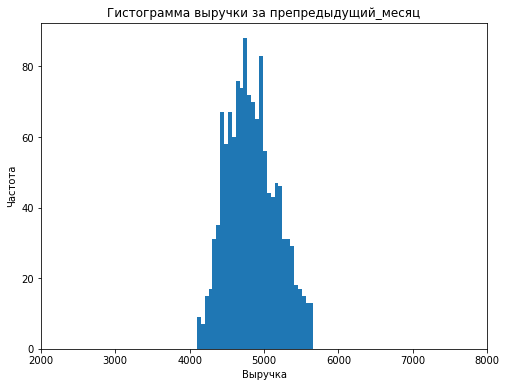

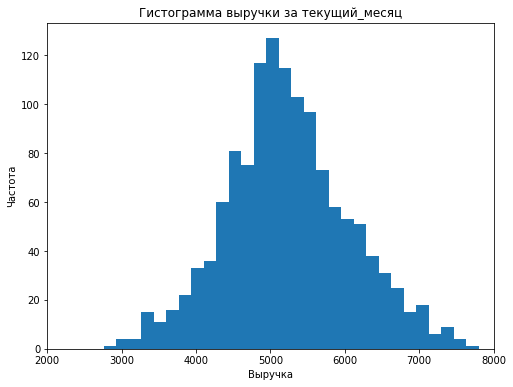

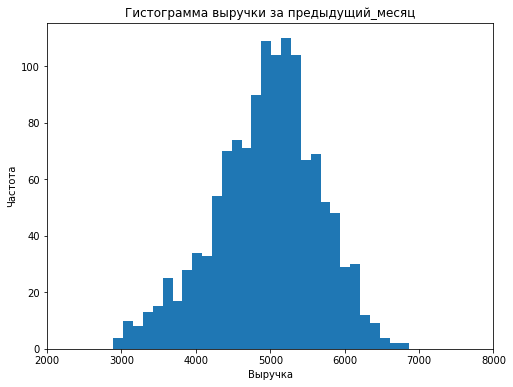

In [45]:
categories = market_money['period'].unique()

for category in categories:
    subset = market_money[market_money['period'] == category]
    subset = subset[(subset['revenue'] < 10000) & (subset['revenue'] > 2000)]
    
    plt.figure(figsize=(8, 6))
    plt.hist(subset['revenue'], bins=30)
    
    plt.xlabel('Выручка')
    plt.ylabel('Частота')
    plt.xlim((2000, 8000))
    plt.title(f'Гистограмма выручки за {category}')
    plt.show()

Здесь мы видим, что:
1. Выручка по месяцам распределена близко к нормальному распределению
2. Есть небольшие группы выбросов - в препредыдущем и предыдущем месяце есть пользователи, от которых не было выручки, а в текущем есть выброс с очень большой выручкой. Пользователи с нулевой выручкой - это вероятно те, кто еще не был зарегистрирован в системе (это можно проверить после объединения), либо те, кто ничего не купили в этот период. А выброс с большой выручкой (см. следующую ячейку) единственный, у данного пользователя другие месяцы в основной массе выручек. Причиной этого выброса может быть очень много покупок в текущем месяце (но тогда бы были выбросы в первой таблице, например, в показателе "Страниц за визит", а также тогда бы его время на сайте (см. ниже) в текущем месяце было бы тоже высоким; либо данный покупатель купил что-то очень крупное, но тогда бы он, вероятно, был не один, а были бы другие покупатели, которые что-то крупное бы купили; либо это ошибка при заполнении данных. В любом случае этот выброс может сильно повлиять на определенные методы, такие как логистическая регрессия (уж очень большой выброс), и его вероятно стоит удалить и заменить на медианное значение выручки в текущем периоде.
3. Все месяца имеют примерно одинаковые показатели средней выручки, но очень разный разброс, особенно препредыдущий месяц, который имеет сильно меньший разброс данных, чем остальные два месяца, поэтому важно не упускать масштабирование данных как этап подготовки модели

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [46]:
market_money[market_money['id'] == 215380]

id               period   revenue
96  215380  препредыдущий_месяц    5051.0
97  215380     предыдущий_месяц    6077.0
98  215380        текущий_месяц  106862.2

In [47]:
market_time[market_time['id'] == 215380]

id            period  time
64  215380  предыдущий_месяц    12
65  215380     текущий_месяц    14

In [48]:
market_money.loc[market_money['revenue'] > 10000, 'revenue'] = market_money['revenue'].median()

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Действительно явный выброс.
Можно удалить, а можно и заполнить, например значением предыдущего месяца.</font>

In [49]:
market_money.groupby('period')['revenue'].describe()

count         mean         std     min      25%  \
period                                                                  
предыдущий_месяц     1300.0  4936.920385  739.597997     0.0  4496.75   
препредыдущий_месяц  1300.0  4825.206923  405.979663     0.0  4583.00   
текущий_месяц        1300.0  5236.572615  835.188961  2758.7  4706.05   

                         50%       75%     max  
period                                          
предыдущий_месяц     5005.00  5405.625  6869.5  
препредыдущий_месяц  4809.00  5053.500  5663.0  
текущий_месяц        5179.55  5759.275  7799.4

Посмотрим аналогично на таблицу `market_time`:

In [50]:
market_time.groupby('period')['time'].describe()

count       mean       std  min   25%   50%   75%   max
period                                                                    
предыдущий_месяц  1300.0  13.467692  3.932029  5.0  11.0  13.0  17.0  23.0
текущий_месяц     1300.0  13.204615  4.220589  4.0  10.0  13.0  16.0  23.0

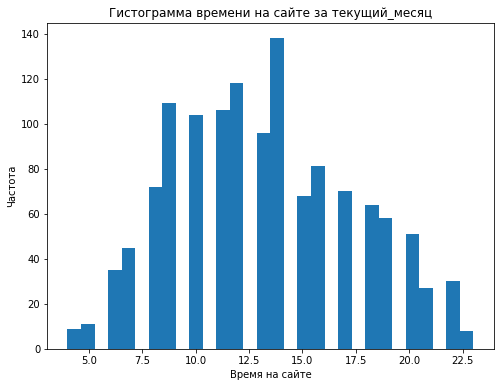

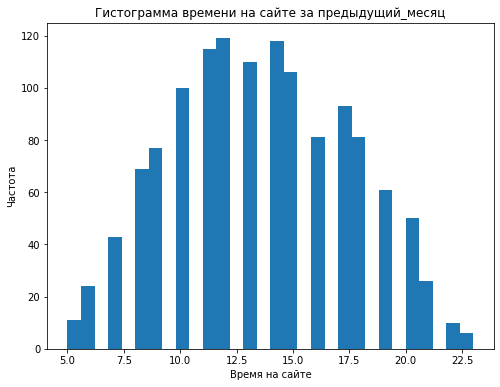

In [51]:
categories = market_time['period'].unique()

for category in categories:
    subset = market_time[market_time['period'] == category]
    
    plt.figure(figsize=(8, 6))
    plt.hist(subset['time'], bins=30)
    
    plt.xlabel('Время на сайте')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма времени на сайте за {category}')
    plt.show()

Мы видим, что время на сайте за два периода распределены похожим образом, распределение относительно близко к нормальному, средние значения и разбросы довольно близкие, выбросов нет. Посмотрим теперь на последнюю таблицу - с прибылью:

In [52]:
money['profit'].describe()

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: profit, dtype: float64

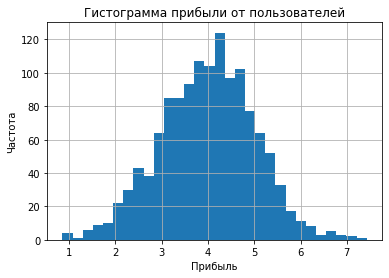

In [53]:
plt.title('Гистограмма прибыли от пользователей')
plt.xlabel('Прибыль')
plt.ylabel('Частота')
money['profit'].hist(bins=30);

Мы видим, что распределение весьма близко к нормальному, выбросов нет.

По результатам исследовательского анализа можно сделать следующие выводы:
1. Мы проверили распределения всех признаков в данных, оценили нормальность распределения количественных признаков и сбалансированность категориальных
2. Все категориальные признаки распределены несбалансированно, однако категории меньшинства достаточно представлены в данных, и несбалансированность не такая серьезная
3. Из количественных переменных стоит отметить переменную Акционные покупки, которая делит данные на 2 кластера - тех, кто покупает практически только акционные товары, и тех, кто их покупает существенно реже
4. Также стоит отметить переменную Маркетинговая активность текущего месяца, в которой всего 3 варианты значения, следовательно ее можно рассматривать как категориальную переменную.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Хорошая работа в части исследования данных: молодец, что используешь функции, а также применяешь подходящие для типов данных инструменты.</font>

## Объединение таблиц

Теперь объединим данные из всех таблиц. Для начала посмотрим еще раз на эти данные:

In [54]:
show_data(market_data)

id purchase_activity service_type message_consent  market_commun_6  \
0  215348         Снизилась      премиум              да              3.4   
1  215349         Снизилась      премиум              да              4.4   
2  215350         Снизилась     стандарт             нет              4.9   
3  215351         Снизилась     стандарт              да              3.2   
4  215352         Снизилась     стандарт             нет              5.1   

   market_commun_1  register_days  promot_purchases            pop_cat  \
0                5            121              0.00   Товары для детей   
1                4            819              0.75   Товары для детей   
2                3            539              0.14  Домашний текстиль   
3                5            896              0.99   Товары для детей   
4                3           1064              0.94   Товары для детей   

   avg_cat_views_visit  unpaid_products  service_errors  pages_visit  
0                    6                2               1            5  
1                    4                4               2            5  
2                    5                2               1            5  
3                    5                0               6            4  
4                    3                2               3            2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1300 non-null   int64  
 1   purchase_activity    1300 non-null   object 
 2   service_type         1300 non-null   object 
 3   message_consent      1300 non-null   object 
 4   market_commun_6      1300 non-null   float64
 5   market_commun_1      1300 non-null   int64  
 6   register_days        1300 non-null   int64  
 7   promot_purchases     1300 non-null   float64
 8   pop_cat              1300 non-null   object 
 9   avg_cat_views_visit  1300 non-null   int64  
 10  unpaid_products      1300 non-null   int64  
 11  service_errors       1300 non-null   int64  
 12  pages_visit          1300 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 132.2+ KB


In [55]:
show_data(market_money)

id               period  revenue
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   period   3900 non-null   object 
 2   revenue  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [56]:
show_data(market_time)

id            period  time
0  215348     текущий_месяц    14
1  215348  предыдущий_месяц    13
2  215349     текущий_месяц    10
3  215349  предыдущий_месяц    12
4  215350     текущий_месяц    13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   period  2600 non-null   object
 2   time    2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [57]:
show_data(money)

id  profit
0  215348    0.98
1  215349    4.16
2  215350    3.13
3  215351    4.87
4  215352    4.21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1300 non-null   int64  
 1   profit  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Перед объединением нужно перевести таблицы `market_money` и `market_time` из длинного формата в широкий:

In [58]:
# Переименуем значения категорий, чтобы в названиях столбцов была латиница
market_money.loc[market_money['period'] == 'текущий_месяц', 'period'] = 'current'
market_money.loc[market_money['period'] == 'предыдущий_месяц', 'period'] = 'last'
market_money.loc[market_money['period'] == 'препредыдущий_месяц', 'period'] = 'prelast'

# Переделаем данные в широкий формат
market_money = market_money.pivot(index='id', columns='period', values='revenue')

# Переименуем столбцы
market_money.columns = [f'revenue_{col}' for col in market_money.columns]

# Выделим id обратно в столбец
market_money.reset_index(inplace=True)

# Посмотрим на результат
show_data(market_money)

id  revenue_current  revenue_last  revenue_prelast
0  215348           3293.1           0.0              0.0
1  215349           4971.6        5216.0           4472.0
2  215350           5058.4        5457.5           4826.0
3  215351           6610.4        6158.0           4793.0
4  215352           5872.5        5807.5           4594.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1300 non-null   int64  
 1   revenue_current  1300 non-null   float64
 2   revenue_last     1300 non-null   float64
 3   revenue_prelast  1300 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 40.8 KB


Перевод в широкий формат прошел успешно, проделаем то же самое со второй таблицей:

In [59]:
# Переименуем значения категорий, чтобы в названиях столбцов была латиница
market_time.loc[market_time['period'] == 'текущий_месяц', 'period'] = 'current'
market_time.loc[market_time['period'] == 'предыдущий_месяц', 'period'] = 'last'


# Переделаем данные в широкий формат
market_time = market_time.pivot(index='id', columns='period', values='time')

# Переименуем столбцы
market_time.columns = [f'time_{col}' for col in market_time.columns]

# Выделим id обратно в столбец
market_time.reset_index(inplace=True)

# Посмотрим на результат
show_data(market_time)

id  time_current  time_last
0  215348            14         13
1  215349            10         12
2  215350            13          8
3  215351            13         11
4  215352            11          8

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id            1300 non-null   int64
 1   time_current  1300 non-null   int64
 2   time_last     1300 non-null   int64
dtypes: int64(3)
memory usage: 30.6 KB


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Отлично!  Развернули таблицы.</font>

Теперь у нас во всех таблицах 1300 строк (а в новых широких таблицах нет пропущенных значений), поэтому можно объединять данные:

In [60]:
market_data = pd.merge(market_data, market_money, on='id', how='left')
market_data = pd.merge(market_data, market_time, on='id', how='left')
market_data = pd.merge(market_data, money, on='id', how='left')

show_data(market_data)

id purchase_activity service_type message_consent  market_commun_6  \
0  215348         Снизилась      премиум              да              3.4   
1  215349         Снизилась      премиум              да              4.4   
2  215350         Снизилась     стандарт             нет              4.9   
3  215351         Снизилась     стандарт              да              3.2   
4  215352         Снизилась     стандарт             нет              5.1   

   market_commun_1  register_days  promot_purchases            pop_cat  \
0                5            121              0.00   Товары для детей   
1                4            819              0.75   Товары для детей   
2                3            539              0.14  Домашний текстиль   
3                5            896              0.99   Товары для детей   
4                3           1064              0.94   Товары для детей   

   avg_cat_views_visit  unpaid_products  service_errors  pages_visit  \
0                    6                2               1            5   
1                    4                4               2            5   
2                    5                2               1            5   
3                    5                0               6            4   
4                    3                2               3            2   

   revenue_current  revenue_last  revenue_prelast  time_current  time_last  \
0           3293.1           0.0              0.0            14         13   
1           4971.6        5216.0           4472.0            10         12   
2           5058.4        5457.5           4826.0            13          8   
3           6610.4        6158.0           4793.0            13         11   
4           5872.5        5807.5           4594.0            11          8   

   profit  
0    0.98  
1    4.16  
2    3.13  
3    4.87  
4    4.21

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1300 non-null   int64  
 1   purchase_activity    1300 non-null   object 
 2   service_type         1300 non-null   object 
 3   message_consent      1300 non-null   object 
 4   market_commun_6      1300 non-null   float64
 5   market_commun_1      1300 non-null   int64  
 6   register_days        1300 non-null   int64  
 7   promot_purchases     1300 non-null   float64
 8   pop_cat              1300 non-null   object 
 9   avg_cat_views_visit  1300 non-null   int64  
 10  unpaid_products      1300 non-null   int64  
 11  service_errors       1300 non-null   int64  
 12  pages_visit          1300 non-null   int64  
 13  revenue_current      1300 non-null   float64
 14  revenue_last         1300 non-null   float64
 15  revenue_prelast      1300 non-null   f

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Верно, при объединении таблиц нужно привязаться к уникальному `"id"`.</font>

Объединение прошло успешно, как видно по информации, все ячейки дата фрейма заполнены. Посмотрим теперь на покупателей, от которых было 0 выручки за предыдущий и препредыдущий месяцы (это одни и те же пользователи):

In [62]:
market_data[(market_data['revenue_last'] == 0) | (market_data['revenue_prelast'] == 0)]

id purchase_activity service_type message_consent  market_commun_6  \
0   215348         Снизилась      премиум              да              3.4   
9   215357         Снизилась     стандарт              да              3.9   
11  215359         Снизилась     стандарт              да              4.6   

    market_commun_1  register_days  promot_purchases  \
0                 5            121               0.0   
9                 5            154               0.0   
11                5            110               0.0   

                           pop_cat  avg_cat_views_visit  unpaid_products  \
0                 Товары для детей                    6                2   
9   Техника для красоты и здоровья                    3                3   
11               Домашний текстиль                    4                2   

    service_errors  pages_visit  revenue_current  revenue_last  \
0                1            5           3293.1           0.0   
9                9            5           5986.3           0.0   
11               4            2           4735.0           0.0   

    revenue_prelast  time_current  time_last  profit  
0               0.0            14         13    0.98  
9               0.0             6         12    4.66  
11              0.0            11         13    5.08

Их всего трое, они зарегистрировались больше, чем месяц назад, но либо ничего не покупали, либо это была ошибка в данных. В любом случае, у этих пользователей не было покупательской активности во все 3 месяца, поэтому удалим их:

In [64]:
rows_to_drop = market_data[market_data['revenue_last'] == 0].index
market_data = market_data.drop(rows_to_drop).reset_index(drop=True)
show_data(market_data)

id purchase_activity service_type message_consent  market_commun_6  \
0  215349         Снизилась      премиум              да              4.4   
1  215350         Снизилась     стандарт             нет              4.9   
2  215351         Снизилась     стандарт              да              3.2   
3  215352         Снизилась     стандарт             нет              5.1   
4  215353         Снизилась     стандарт              да              3.3   

   market_commun_1  register_days  promot_purchases            pop_cat  \
0                4            819              0.75   Товары для детей   
1                3            539              0.14  Домашний текстиль   
2                5            896              0.99   Товары для детей   
3                3           1064              0.94   Товары для детей   
4                4            762              0.26  Домашний текстиль   

   avg_cat_views_visit  unpaid_products  service_errors  pages_visit  \
0                    4                4               2            5   
1                    5                2               1            5   
2                    5                0               6            4   
3                    3                2               3            2   
4                    4                1               1            4   

   revenue_current  revenue_last  revenue_prelast  time_current  time_last  \
0           4971.6        5216.0           4472.0            10         12   
1           5058.4        5457.5           4826.0            13          8   
2           6610.4        6158.0           4793.0            13         11   
3           5872.5        5807.5           4594.0            11          8   
4           5388.5        4738.5           5124.0            10         10   

   profit  
0    4.16  
1    3.13  
2    4.87  
3    4.21  
4    3.95

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1297 non-null   int64  
 1   purchase_activity    1297 non-null   object 
 2   service_type         1297 non-null   object 
 3   message_consent      1297 non-null   object 
 4   market_commun_6      1297 non-null   float64
 5   market_commun_1      1297 non-null   int64  
 6   register_days        1297 non-null   int64  
 7   promot_purchases     1297 non-null   float64
 8   pop_cat              1297 non-null   object 
 9   avg_cat_views_visit  1297 non-null   int64  
 10  unpaid_products      1297 non-null   int64  
 11  service_errors       1297 non-null   int64  
 12  pages_visit          1297 non-null   int64  
 13  revenue_current      1297 non-null   float64
 14  revenue_last         1297 non-null   float64
 15  revenue_prelast      1297 non-null   f

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Нужно удалить пользователей без покупок хотя бы в одном из трёх месяцев, у них активность менее трёх месяцев. Это можно проявить по выручке.</font>
```Markdown
Отберите клиентов с покупательской активностью не менее трёх месяцев.
```

<span style="color: purple; font-weight: bold">Видимо, я просмотрел этот пункт в задаче, переделал</span>

Данные пользователи удалены, теперь перейдем к корреляционному анализу.

## Корреляционный анализ

Сначала посмотрим на корреляции между количественными признаками. Т.к. многие признаки распределены далеко ненормально, то используем для этого корреляцию Спирмана, а также построим матрицу диаграмм:

In [65]:
(
    market_data
    .loc[:, market_data.columns != 'id']
    .select_dtypes(include=['number'])
    .corr(method='spearman')
)

market_commun_6  market_commun_1  register_days  \
market_commun_6             1.000000         0.061697      -0.044614   
market_commun_1             0.061697         1.000000      -0.131979   
register_days              -0.044614        -0.131979       1.000000   
promot_purchases           -0.277968         0.033045       0.029186   
avg_cat_views_visit         0.185027        -0.025158      -0.043150   
unpaid_products            -0.134368         0.061754      -0.108822   
service_errors              0.038656         0.087351       0.103528   
pages_visit                 0.319918         0.003144      -0.034591   
revenue_current             0.002680        -0.011758       0.014968   
revenue_last               -0.005652        -0.027107       0.013739   
revenue_prelast             0.233325        -0.039397      -0.039284   
time_current                0.226345        -0.063044       0.083035   
time_last                   0.274003         0.013538      -0.124000   
profit                     -0.011598        -0.026483       0.027935   

                     promot_purchases  avg_cat_views_visit  unpaid_products  \
market_commun_6             -0.277968             0.185027        -0.134368   
market_commun_1              0.033045            -0.025158         0.061754   
register_days                0.029186            -0.043150        -0.108822   
promot_purchases             1.000000            -0.203380         0.197624   
avg_cat_views_visit         -0.203380             1.000000        -0.251448   
unpaid_products              0.197624            -0.251448         1.000000   
service_errors              -0.051590             0.010034        -0.098544   
pages_visit                 -0.370853             0.267536        -0.165297   
revenue_current              0.021681            -0.070625         0.061280   
revenue_last                 0.007035            -0.049596         0.032958   
revenue_prelast             -0.267790             0.149619        -0.249421   
time_current                -0.274693             0.233358        -0.214803   
time_last                   -0.332743             0.148376        -0.183426   
profit                      -0.037042            -0.039135        -0.003825   

                     service_errors  pages_visit  revenue_current  \
market_commun_6            0.038656     0.319918         0.002680   
market_commun_1            0.087351     0.003144        -0.011758   
register_days              0.103528    -0.034591         0.014968   
promot_purchases          -0.051590    -0.370853         0.021681   
avg_cat_views_visit        0.010034     0.267536        -0.070625   
unpaid_products           -0.098544    -0.165297         0.061280   
service_errors             1.000000     0.104508         0.040518   
pages_visit                0.104508     1.000000        -0.049886   
revenue_current            0.040518    -0.049886         1.000000   
revenue_last               0.035383    -0.067879         0.877630   
revenue_prelast            0.090105     0.311428         0.149703   
time_current               0.078089     0.298113        -0.164872   
time_last                  0.196017     0.450913        -0.143179   
profit                     0.029870    -0.021610        -0.023645   

                     revenue_last  revenue_prelast  time_current  time_last  \
market_commun_6         -0.005652         0.233325      0.226345   0.274003   
market_commun_1         -0.027107        -0.039397     -0.063044   0.013538   
register_days            0.013739        -0.039284      0.083035  -0.124000   
promot_purchases         0.007035        -0.267790     -0.274693  -0.332743   
avg_cat_views_visit     -0.049596         0.149619      0.233358   0.148376   
unpaid_products          0.032958        -0.249421     -0.214803  -0.183426   
service_errors           0.035383         0.090105      0.078089   0.196017   
pages_visit             -0.067879         0.311428      0.298113   0.450913   
revenue

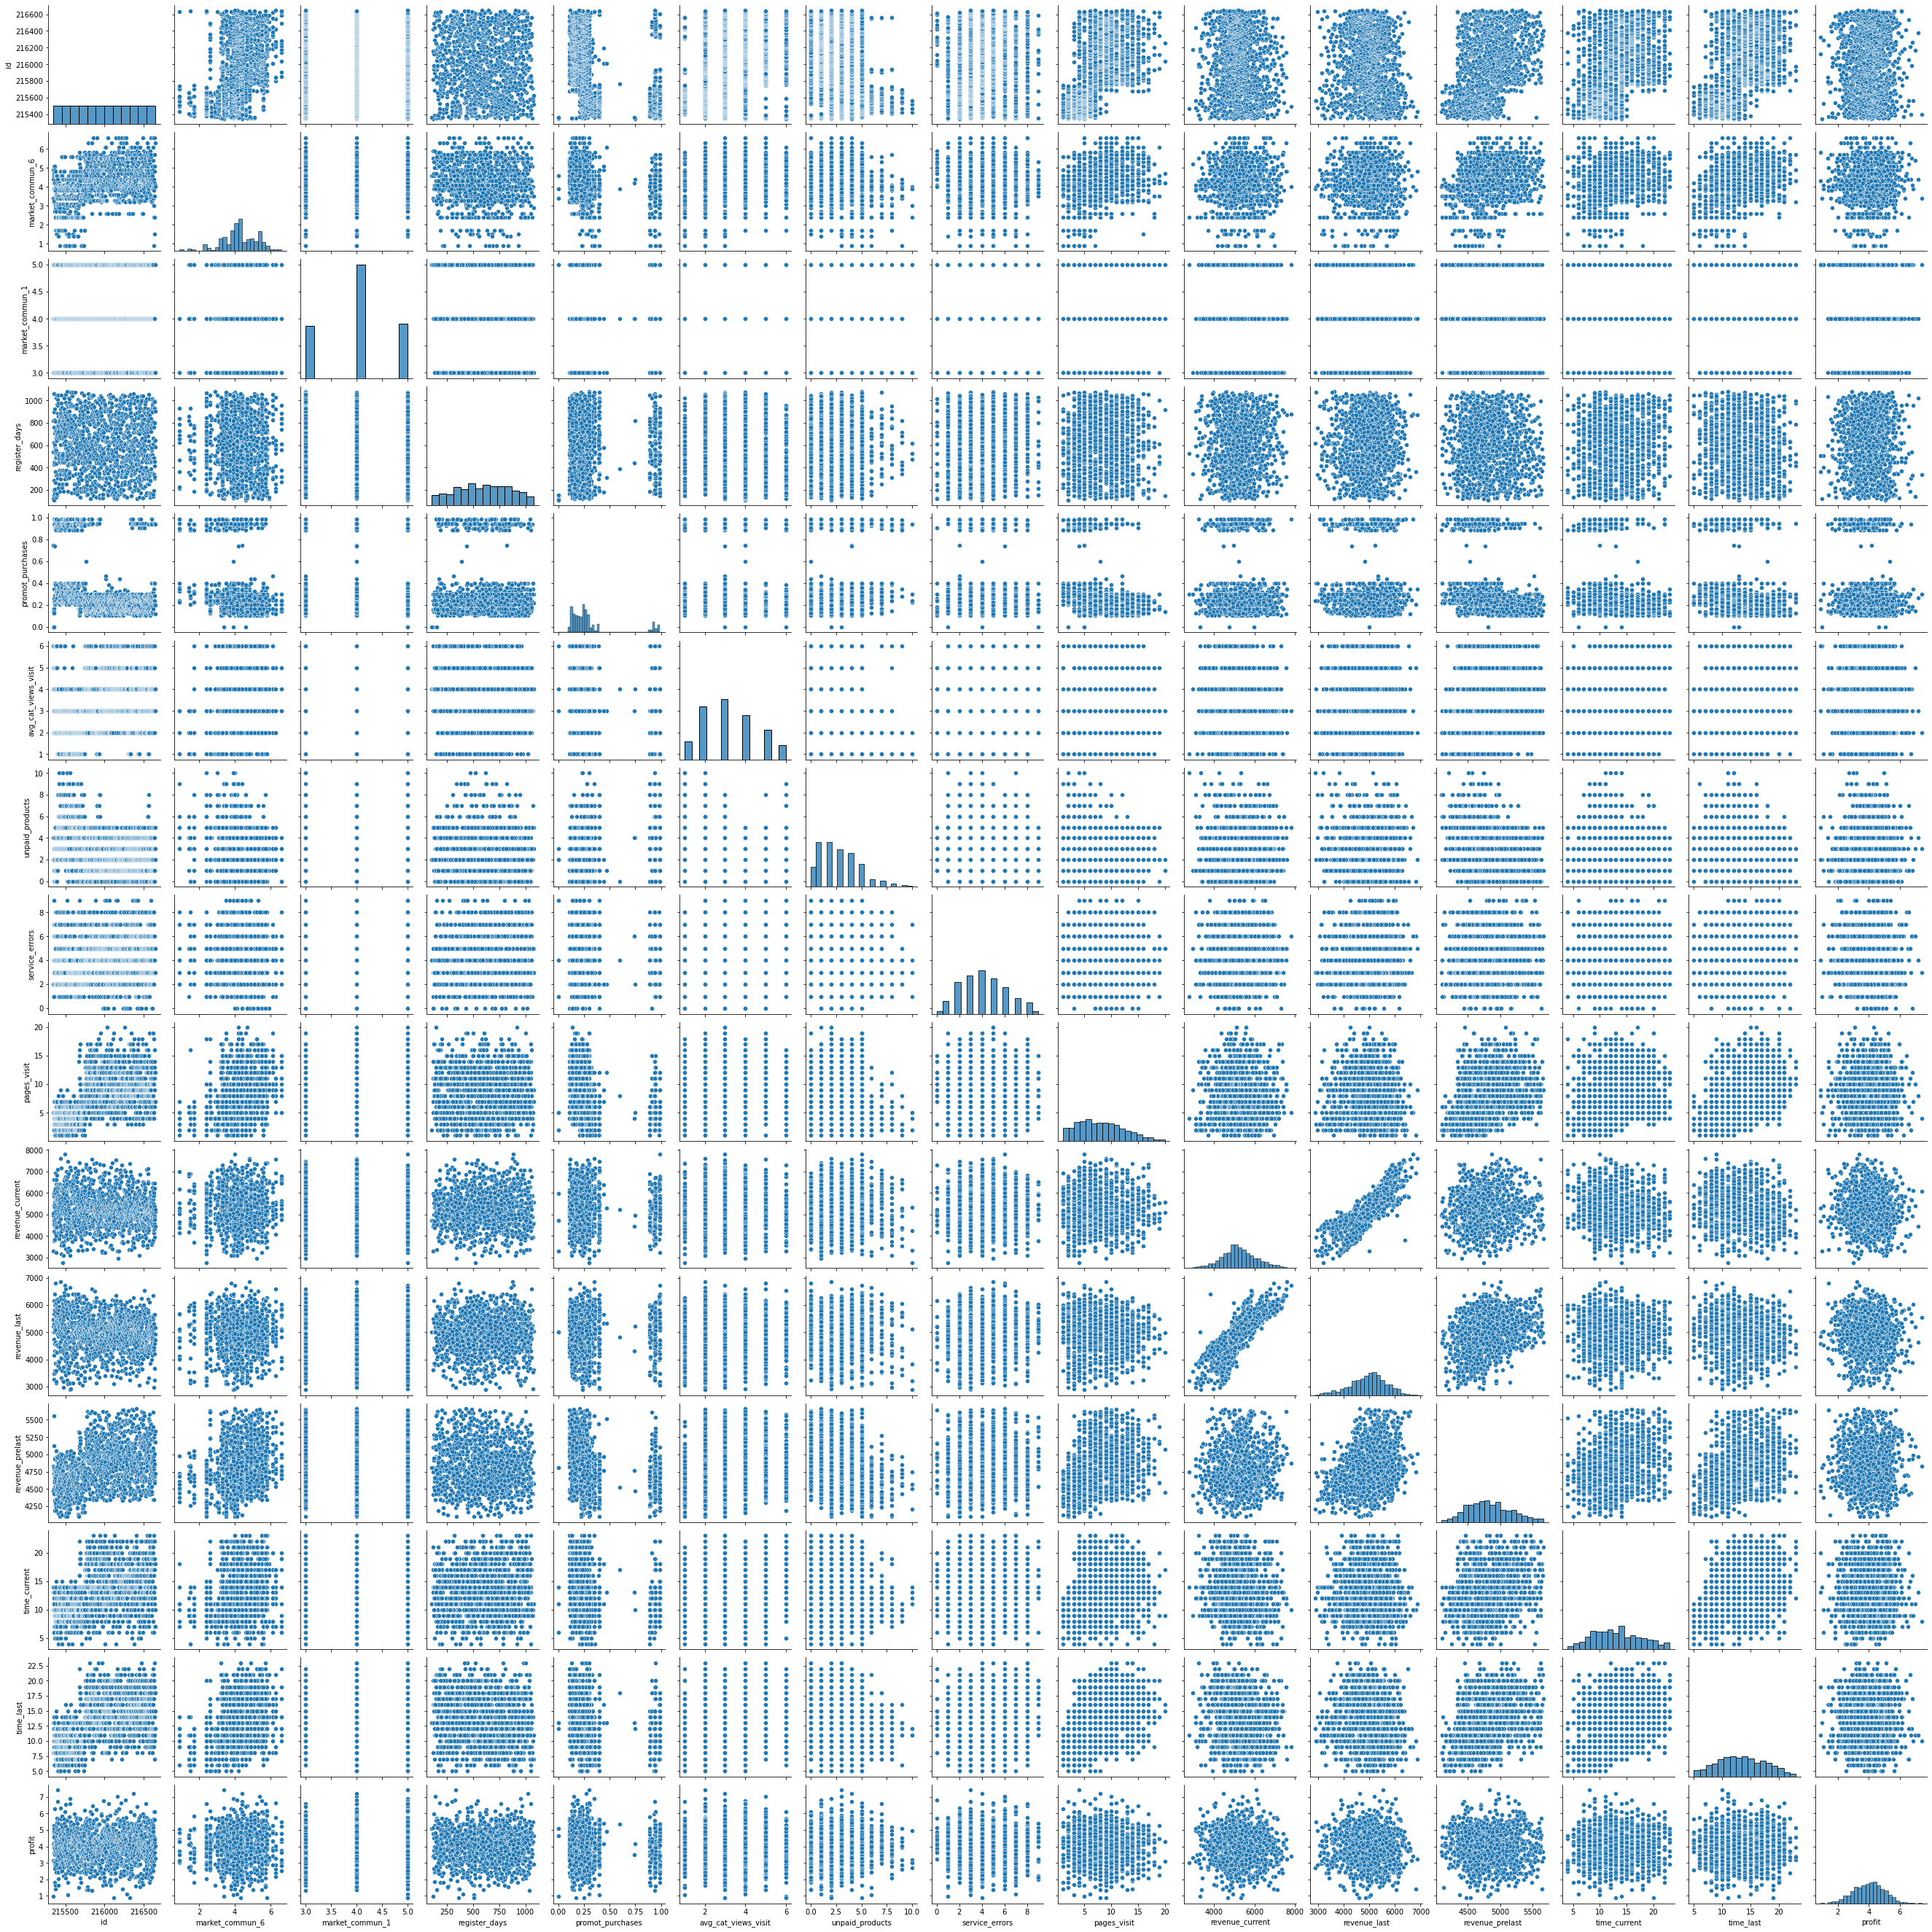

In [62]:
sns.pairplot(market_data.select_dtypes(include=['number']));

Эта диаграмма достаточно мелкая, чтобы рассматривать детали, но по ней можно посмотреть в целом какие-то характерные паттерны (линейные и нелинейные). Мы видим некоторые нелинейные паттерны, в частности между маркетинговой коммуникацией за последние полгода и временем, проведенном на сайте. Также мы видим высокую корреляцию между выручкой в текущем и предыдущем месяце (0.876), но скорее здесь можно не говорить о коллинеарности между этими признаками (где-то близко к границе коллинеарности, но не совсем). Можно будет проверить перформанс модели с обоими признаками или только с одним из них.

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

Посмотрим также на фи-корреляции, которые позволят подробнее посмотреть на взаимосвязи и возможную коллинеарность, в том числе нелинейные:

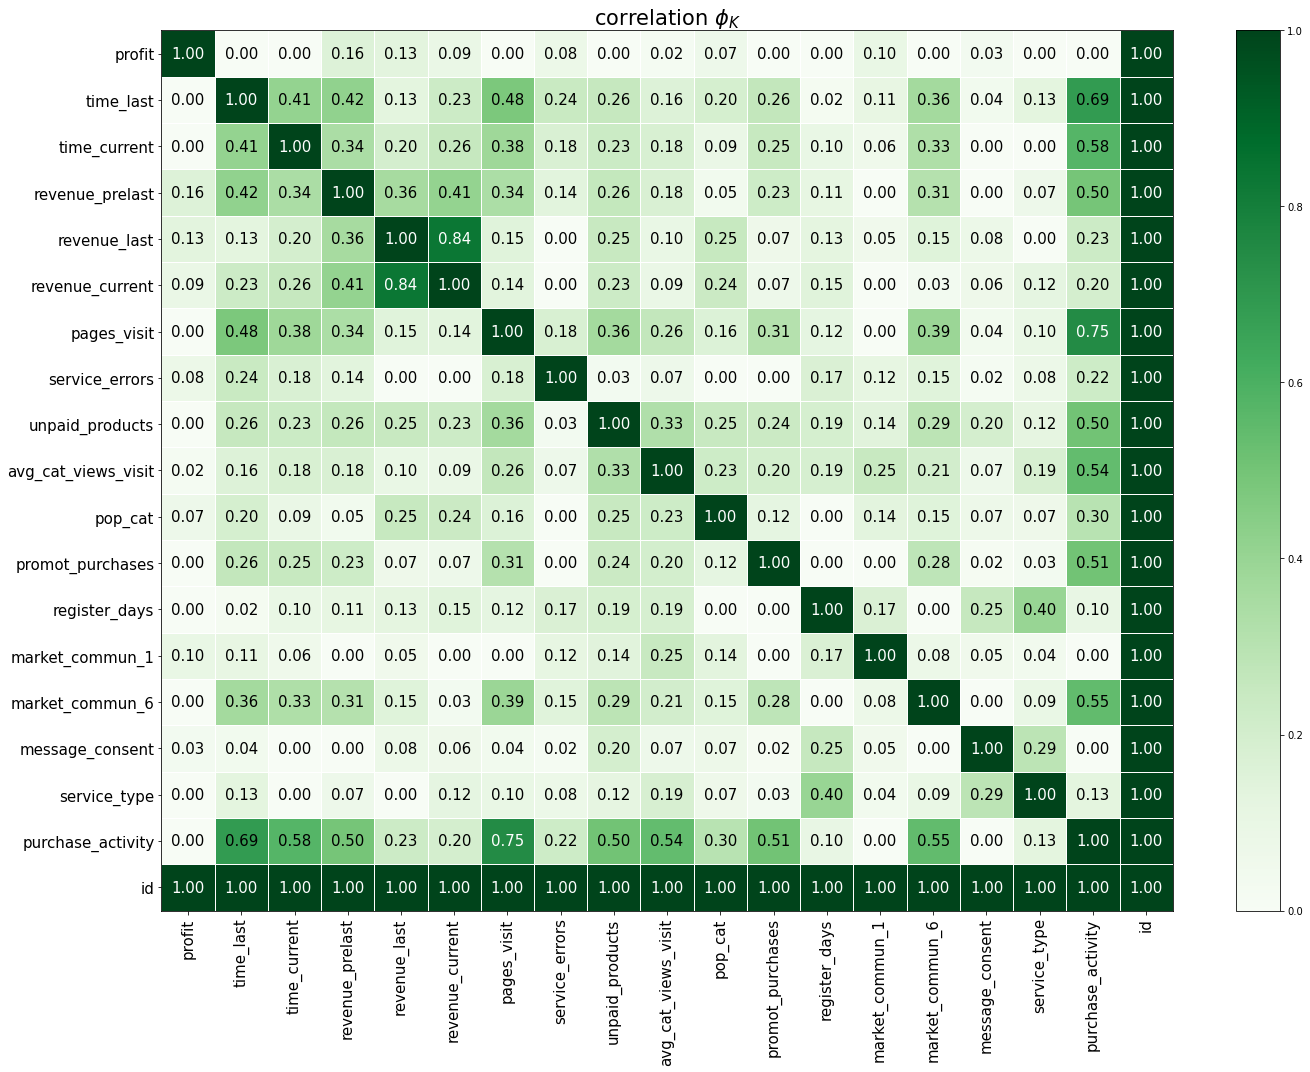

In [85]:
num_columns = ['market_commun_6', 'register_days', 'promot_purchases', 'avg_cat_views_visit', 
               'unpaid_products', 'service_errors', 'pages_visit', 'revenue_current',
               'revenue_last', 'revenue_prelast', 'time_current', 'time_last', 'profit']

phik_overview = market_data.phik_matrix(interval_cols=num_columns)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

В целом, здесь мы видим похожую картину на предыдущие корреляции, так же максимальная корреляция здесь между двумя показателями выручки, однако, вероятно, этого недостаточно для того, чтобы говорить о коллинеарности. Также видны кандидаты на то, чтобы быть хорошими предикторами целевой переменной - это признаки `pages_visit`, `time_last`, `time_current`, `market_commun_6`, `avg_cat_views_visit`, `promot_purchases`, `unpaid_products`, `revenue_prelast`.

Посмотрим теперь более подробно на взаимосвязи между входными признаками и целевым. Для этого построим ящичные диаграммы для количественных признаков и таблицы сопряжения для категориальных.

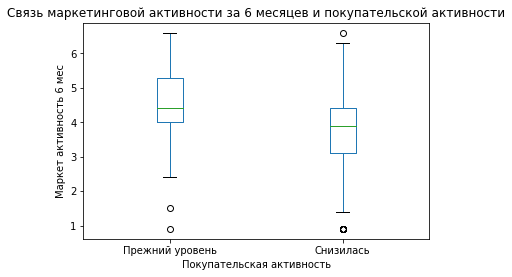

In [66]:
market_data.boxplot(column='market_commun_6', by='purchase_activity', grid=False)
plt.title('Связь маркетинговой активности за 6 месяцев и покупательской активности')
plt.suptitle('')
plt.xlabel('Покупательская активность')
plt.ylabel('Маркет активность 6 мес')

plt.show()

Мы видим, что более высокая маркетинговсая активность в среднем отличает пользователей, у которых не снижается покупательская активность. Это может быть хороший признак для прогнозной модели.

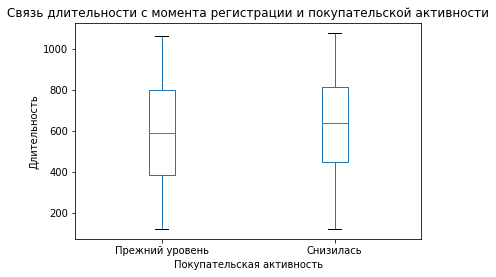

In [67]:
market_data.boxplot(column='register_days', by='purchase_activity', grid=False)
plt.title('Связь длительности с момента регистрации и покупательской активности')
plt.suptitle('')
plt.xlabel('Покупательская активность')
plt.ylabel('Длительность')

plt.show()

Здесь мы видим, что покупатели с прежним уровнем активности примерно с такой же длительностью регистрации, как и покупатели, у которых активность снизилась, что в целом довольно логично.

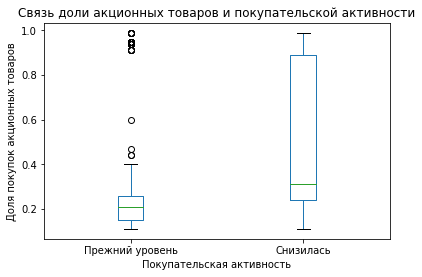

In [68]:
market_data.boxplot(column='promot_purchases', by='purchase_activity', grid=False)
plt.title('Связь доли акционных товаров и покупательской активности')
plt.suptitle('')
plt.xlabel('Покупательская активность')
plt.ylabel('Доля покупок акционных товаров')

plt.show()

Здесь мы видим, что в среднем повышение доли покупок акционных товаров скорее свидетельствует о снижении покупательской активности, но при этом довольно много покупателей с относительно небольшой долей акционных покупок тоже со сниженной активностью. Поэтому данный признак является хорошим признаком для определенных категорий покупателей, но вероятно, для всех покупателей работать будет хуже.

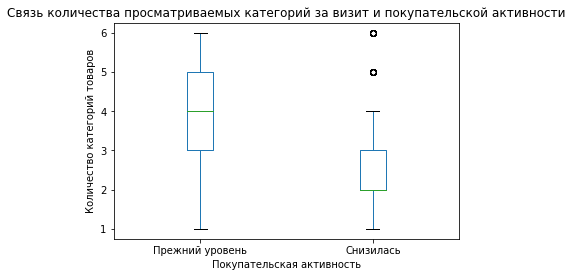

In [69]:
market_data.boxplot(column='avg_cat_views_visit', by='purchase_activity', grid=False)
plt.title('Связь количества просматриваемых категорий за визит и покупательской активности')
plt.suptitle('')
plt.xlabel('Покупательская активность')
plt.ylabel('Количество категорий товаров')

plt.show()

Здесь мы видим довольно четкую взаимосвязь: у покупателей с более высокой активностью больше среднее количество просмотренных категорий.

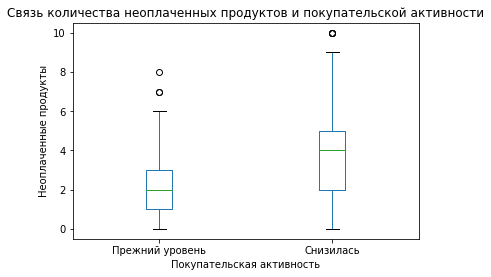

In [70]:
market_data.boxplot(column='unpaid_products', by='purchase_activity', grid=False)
plt.title('Связь количества неоплаченных продуктов и покупательской активности')
plt.suptitle('')
plt.xlabel('Покупательская активность')
plt.ylabel('Неоплаченные продукты')

plt.show()

Здесь мы видим, что у покупателей с более высокой активностью в среднем меньшее количество неоплаченных продуктов. Это хороший признак для модели.

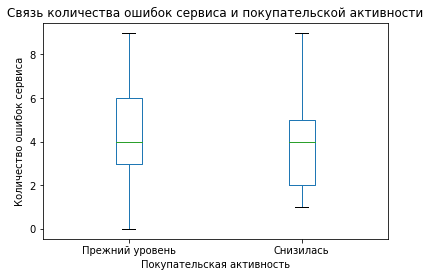

In [71]:
market_data.boxplot(column='service_errors', by='purchase_activity', grid=False)
plt.title('Связь количества ошибок сервиса и покупательской активности')
plt.suptitle('')
plt.xlabel('Покупательская активность')
plt.ylabel('Количество ошибок сервиса')

plt.show()

В целом небольшая разница есть, покупатели с большей активностью в среднем немного больше сталкиваются с ошибками, что вероятно можно как раз объяснить их активностью на сайте.

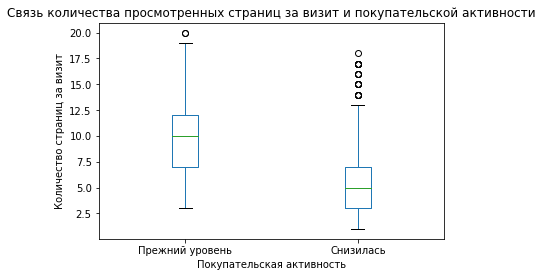

In [72]:
market_data.boxplot(column='pages_visit', by='purchase_activity', grid=False)
plt.title('Связь количества просмотренных страниц за визит и покупательской активности')
plt.suptitle('')
plt.xlabel('Покупательская активность')
plt.ylabel('Количество страниц за визит')

plt.show()

Аналогично, у покупателей с более высокой активностью больше среднее число просмотренных страниц за визит.

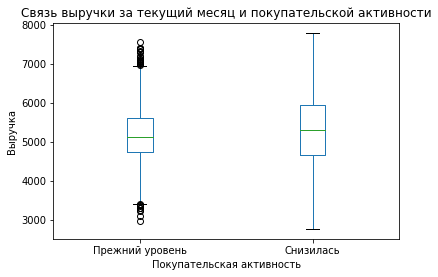

In [73]:
market_data.boxplot(column='revenue_current', by='purchase_activity', grid=False)
plt.title('Связь выручки за текущий месяц и покупательской активности')
plt.suptitle('')
plt.xlabel('Покупательская активность')
plt.ylabel('Выручка')

plt.show()

Мы видим, что в среднем нет большой разницы между выручкой у разных категорий покупателей, однако разброс выручки у тех, у кого активность снизилась, выше.

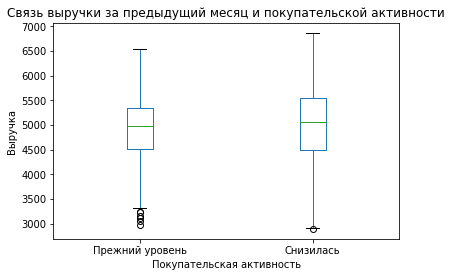

In [74]:
market_data.boxplot(column='revenue_last', by='purchase_activity', grid=False)
plt.title('Связь выручки за предыдущий месяц и покупательской активности')
plt.suptitle('')
plt.xlabel('Покупательская активность')
plt.ylabel('Выручка')

plt.show()

Аналогичная картинка и по выручке за предыдущий месяц.

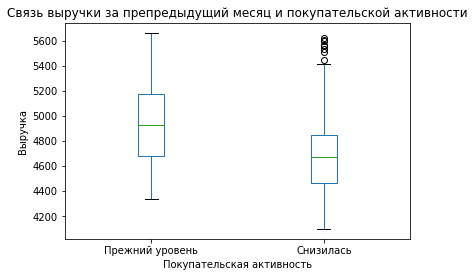

In [75]:
market_data.boxplot(column='revenue_prelast', by='purchase_activity', grid=False)
plt.title('Связь выручки за препредыдущий месяц и покупательской активности')
plt.suptitle('')
plt.xlabel('Покупательская активность')
plt.ylabel('Выручка')

plt.show()

Здесь же мы видим, что выручка за препредыдущий месяц в среднем ниже у тех, у кого снизилась покупательская активность, т.е. это может быть хорошим предиктором активности.

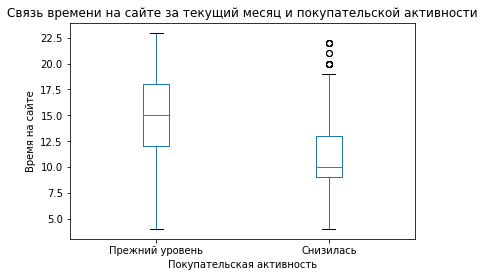

In [76]:
market_data.boxplot(column='time_current', by='purchase_activity', grid=False)
plt.title('Связь времени на сайте за текущий месяц и покупательской активности')
plt.suptitle('')
plt.xlabel('Покупательская активность')
plt.ylabel('Время на сайте')

plt.show()

Здесь мы видим, что время на сайте за текущий месяц в среднем ниже у тех, у кого снизилась покупательская активность.

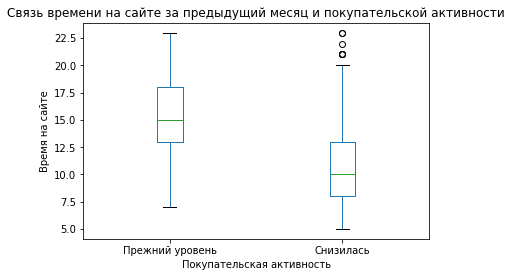

In [77]:
market_data.boxplot(column='time_last', by='purchase_activity', grid=False)
plt.title('Связь времени на сайте за предыдущий месяц и покупательской активности')
plt.suptitle('')
plt.xlabel('Покупательская активность')
plt.ylabel('Время на сайте')

plt.show()

Аналогичную взаимосвязь мы видим и по времени на сайте за предыдущий месяц. Наконец посмотрим на такую же диаграмму для прибыли:

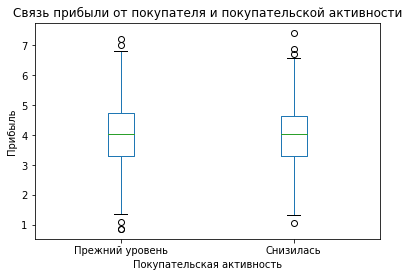

In [78]:
market_data.boxplot(column='profit', by='purchase_activity', grid=False)
plt.title('Связь прибыли от покупателя и покупательской активности')
plt.suptitle('')
plt.xlabel('Покупательская активность')
plt.ylabel('Прибыль')

plt.show()

Мы видим, что прибыль в среднем одинаковая от покупателей с разной активностью. Теперь посмотрим на категориальные переменные:

In [79]:
market_data.pivot_table(index='service_type', columns='purchase_activity', values='id', aggfunc='count')

purchase_activity  Прежний уровень  Снизилась
service_type                                 
премиум                        206        169
стандарт                       596        326

По признаку тип сервиса мы не видим каких-то значимых взаимосвязей с покупательской активностью.

In [80]:
market_data.pivot_table(index='message_consent', columns='purchase_activity', values='id', aggfunc='count')

purchase_activity  Прежний уровень  Снизилась
message_consent                              
да                             591        368
нет                            211        127

Здесь мы тоже не видим особой взаимосвязью между покупательской активностью и наличием согласия на получение рассылки. 

In [81]:
pop_cat_pivot = market_data.pivot_table(index='pop_cat', columns='purchase_activity', 
                                        values='id', aggfunc='count')

total_count = pop_cat_pivot.sum()
pop_cat_pivot = pop_cat_pivot / total_count
pop_cat_pivot

purchase_activity                     Прежний уровень  Снизилась
pop_cat                                                         
Домашний текстиль                            0.185786   0.204040
Косметика и аксесуары                        0.147132   0.212121
Кухонная посуда                              0.089776   0.133333
Мелкая бытовая техника и электроника         0.183292   0.054545
Техника для красоты и здоровья               0.164589   0.103030
Товары для детей                             0.229426   0.292929

Мы видим, что есть некоторые различия между представленностью популярных категорий товаров у покупателей: так, бытовая техника и электроника менее популярная категория у тех, у кого снизилась активность, так же, как и тезника для красоты, в то время, как товары для детей, посуда и косметика скорее более популярны у таких покупателей.

In [82]:
market_data['market_commun_1'] = market_data['market_commun_1'].astype('object')
market_data.pivot_table(index='market_commun_1', columns='purchase_activity', 
                                        values='id', aggfunc='count')

purchase_activity  Прежний уровень  Снизилась
market_commun_1                              
3                              186        122
4                              421        248
5                              195        125

Маркетинговая активность за последний месяц не насколько хорошо связана с покупательской активностью, как маркетинговая активность за последние полгода.

Таким образом, мы провели корреляционный анализ и выявили основные возможные предикторы снижения покупательской способности:
1. Маркетинговая коммуникация за 6 мес
2. Доля акционных покупок
3. Популярная категория
4. Среднее количество просмотренных категорий за визит
5. Количество неоплаченных продуктов
6. Ошибки сервиса
7. Число посещенных страниц за визит
8. Выручка за препредыдущий месяц
9. Время на сайте - и в этом, и в предыдущем месяце

Однако мы не будем удалять остальные переменные из модели, т.к. в них могут быть нелинейные связи, кроме того, мы сможем отобрать признаки при обучении модели.

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Здесь Лучше посмотреть все признаки, включая Таргет.\
Хорошим решением будет использовать коэффициент корреляции $\phi_K$ , это передовой способ вычисления коэффициентов корреляции для любых типов признаков и не требует предварительного кодирования. Кроме того, в библиотеке есть визуализация. Стоит учитывать, что этот коэффициент показывает не только линейные связи, но и нелинейные. Более подробно понять вид связи поможет визуализация с помощью диаграмм рассеяния. Ссылка на документацию: https://phik.readthedocs.io/en/latest/
Пример кода:</font>
```python
from phik.report import plot_correlation_matrix
from phik import report

# список интервальных признаков
interval_cols = [...]

# вычисление коэффициентов корреляции phi для датафрейма df
phik_overview = df.phik_matrix(interval_cols=interval_cols)

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)
```

<span style="color: purple; font-weight: bold">Добавил. Что-то я пропустил это при работе с проектом, хотя хотел сделать)</span>

## Использование пайплайнов

Сначала разделим наш датасет на тренировочную и тестовую выборки:

In [86]:
seed = 42
test_size = 0.25

X = market_data.drop(['id', 'purchase_activity', 'profit'], axis=1)
y = (market_data['purchase_activity'] == 'Снизилась').astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=test_size,
                                                   stratify=y,
                                                   random_state=seed)

print('Размер тренировочной выборки:', X_train.shape)
print('Размер тестовой выборки:', X_test.shape)

Размер тренировочной выборки: (972, 16)
Размер тестовой выборки: (325, 16)


In [87]:
X.columns

Index(['service_type', 'message_consent', 'market_commun_6', 'market_commun_1',
       'register_days', 'promot_purchases', 'pop_cat', 'avg_cat_views_visit',
       'unpaid_products', 'service_errors', 'pages_visit', 'revenue_current',
       'revenue_last', 'revenue_prelast', 'time_current', 'time_last'],
      dtype='object')

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red"> Обрати внимание, Прибыль не должна учавствовать в прогнозе. </span>
```Markdown
4.1 Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся. 
```

Создадим списки переменных разных типов и построим пайплайны для препроцессинга:

In [88]:
ohe_columns = ['service_type', 'message_consent', 'pop_cat']
ord_columns = ['market_commun_1']
num_columns = ['market_commun_6', 'register_days', 'promot_purchases', 'avg_cat_views_visit', 
               'unpaid_products', 'service_errors', 'pages_visit', 'revenue_current',
               'revenue_last', 'revenue_prelast', 'time_current', 'time_last']

In [89]:
ohe_pipe = Pipeline(
    [('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False)),
     ('imputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

<font color='blue'><b>Комментарий ревьюера : </b></font> ❌\
<font color='red'> Здесь не соответствие версии sklearn. В окружении Практикума стоит 0.24.1, в этой версии нет аргумента sparse_output у OneHotEncoder.</font>\
<font color='blue'>Посмотреть версию библиотеки можно так:
```python 
import sklearn
sklearn.__version__
```
Обновить до последней версии:</font>
```
!pip install -Uq scikit-learn
```

In [90]:
ord_pipe = Pipeline(
    [('ord',  OrdinalEncoder(
                categories=[
                    [3, 4, 5]
                ], 
                handle_unknown='error'
            )
        ),
     ('imputer_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [91]:
preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

Напишем гиперпараметры для обучения модели:

In [92]:
pipe_final = Pipeline([
    ('preprocessor', preprocessor),
    ('models', DecisionTreeClassifier(random_state=seed))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=seed)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 18),
        'models__min_samples_leaf': range(3, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 21),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=seed, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': 10 ** np.linspace(-3, 3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC(), kernel='poly'
    {
        'models': [SVC(
            probability= True,
            random_state=seed,
            kernel='poly'
        )],
        'models__degree': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },
    
    # словарь для модели SVC(), kernel='rbf'
    {
        'models': [SVC(
            probability= True,
            random_state=seed,
            kernel='rbf'
        )],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    }
]

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> В SVC нужно передать аргумент probability= True. Что бы можно было работать с вероятностями, если модель выиграет.</font>

Для обучения модели мы воспользуемся такой стратегией:
1. Исследуем широкую сетку гиперпараметров с помощью рандомного поиска
2. Посмотрим на то, какие модели при каких значениях гиперпараметров дают лучшие значения метрик
3. Обучим модели на более узком диапазоне гиперпараметров с помощью поиска по сетке

При этом посмотрим на две метрики: во-первых, F1-метрику, т.к. она обладает чувствительностью к несбалансированным данным, а также ROC AUC, т.к. она контролирует несбалансированные данные, но не настолько чувствительна к ним.

Построим модель из первого пункта:

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [93]:
scoring = {'roc_auc_score': 'roc_auc',
          'f1_score': 'f1'}

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=scoring,
    n_iter=1000,
    random_state=seed,
    n_jobs=-1,
    refit='f1_score'
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse=False)),
                                                                                               ('imputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent'))]),
                                                                               ['service_type',
                                      

Построим графики метрик моделей по значениям гиперпараметров:

In [94]:
cv_results = pd.DataFrame(randomized_search.cv_results_)

cv_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   mean_fit_time                   1000 non-null   float64
 1   std_fit_time                    1000 non-null   float64
 2   mean_score_time                 1000 non-null   float64
 3   std_score_time                  1000 non-null   float64
 4   param_preprocessor__num         1000 non-null   object 
 5   param_models__min_samples_leaf  933 non-null    object 
 6   param_models__max_features      933 non-null    object 
 7   param_models__max_depth         933 non-null    object 
 8   param_models                    1000 non-null   object 
 9   param_models__C                 46 non-null     object 
 10  param_models__degree            7 non-null      object 
 11  param_models__n_neighbors       14 non-null     object 
 12  params                          100

Посмотрим модели логистической регрессии:

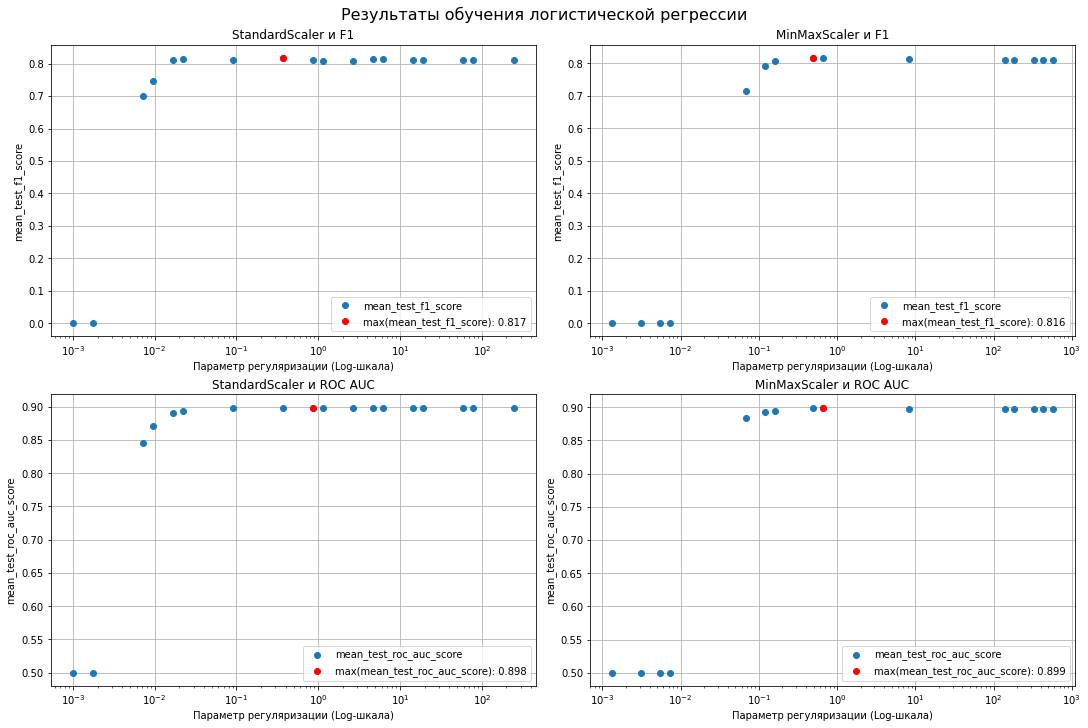

In [95]:
# Создадим все диаграммы
fig, axs = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=True)

# Перечислим варианты для диаграмм (метод масштабирования, метрика, заголовок диаграммы)
plot_settings = [
    ('param_preprocessor__num', StandardScaler(), 'mean_test_f1_score', 'StandardScaler и F1'),
    ('param_preprocessor__num', MinMaxScaler(), 'mean_test_f1_score', 'MinMaxScaler и F1'),
    ('param_preprocessor__num', StandardScaler(), 'mean_test_roc_auc_score', 'StandardScaler и ROC AUC'),
    ('param_preprocessor__num', MinMaxScaler(), 'mean_test_roc_auc_score', 'MinMaxScaler и ROC AUC')
]

# Создадим каждую диаграмму
for ax, (preprocessor_label, scaler, metric, title) in zip(axs.ravel(), plot_settings):
    # Выделим необходимые данные
    ploted_results = cv_results[cv_results[preprocessor_label].astype('str') == str(scaler)]
    
    # Построим диаграмму
    ax.plot(ploted_results['param_models__C'], ploted_results[metric], 'o', label=f'{metric}')
    
    # Выделим точку с максимальным значением метрики
    max_index = ploted_results.loc[~ploted_results['param_models__C'].isna(), metric].idxmax()
    max_x = ploted_results.loc[max_index, 'param_models__C']
    max_y = ploted_results.loc[max_index, metric]
    ax.plot(max_x, max_y, 'ro', color='r', label=f'max({metric}): {max_y:.3f}')
    
    # Оформление
    ax.set_xscale('log')
    ax.set_xlabel('Параметр регуляризации (Log-шкала)')
    ax.set_ylabel(metric)
    ax.legend()
    ax.set_title(title)
    ax.grid(True)

fig.suptitle('Результаты обучения логистической регрессии', fontsize=16)
plt.show()

Мы видим, что наибольшую F1 метрику показали модели со Стандартным масштабированием и отсутствием регуляризации (параметр регуляризации 0.1), но в целом достаточные модели и до параметра С = 1.

Посмотрим теперь на результаты Дерева решений:

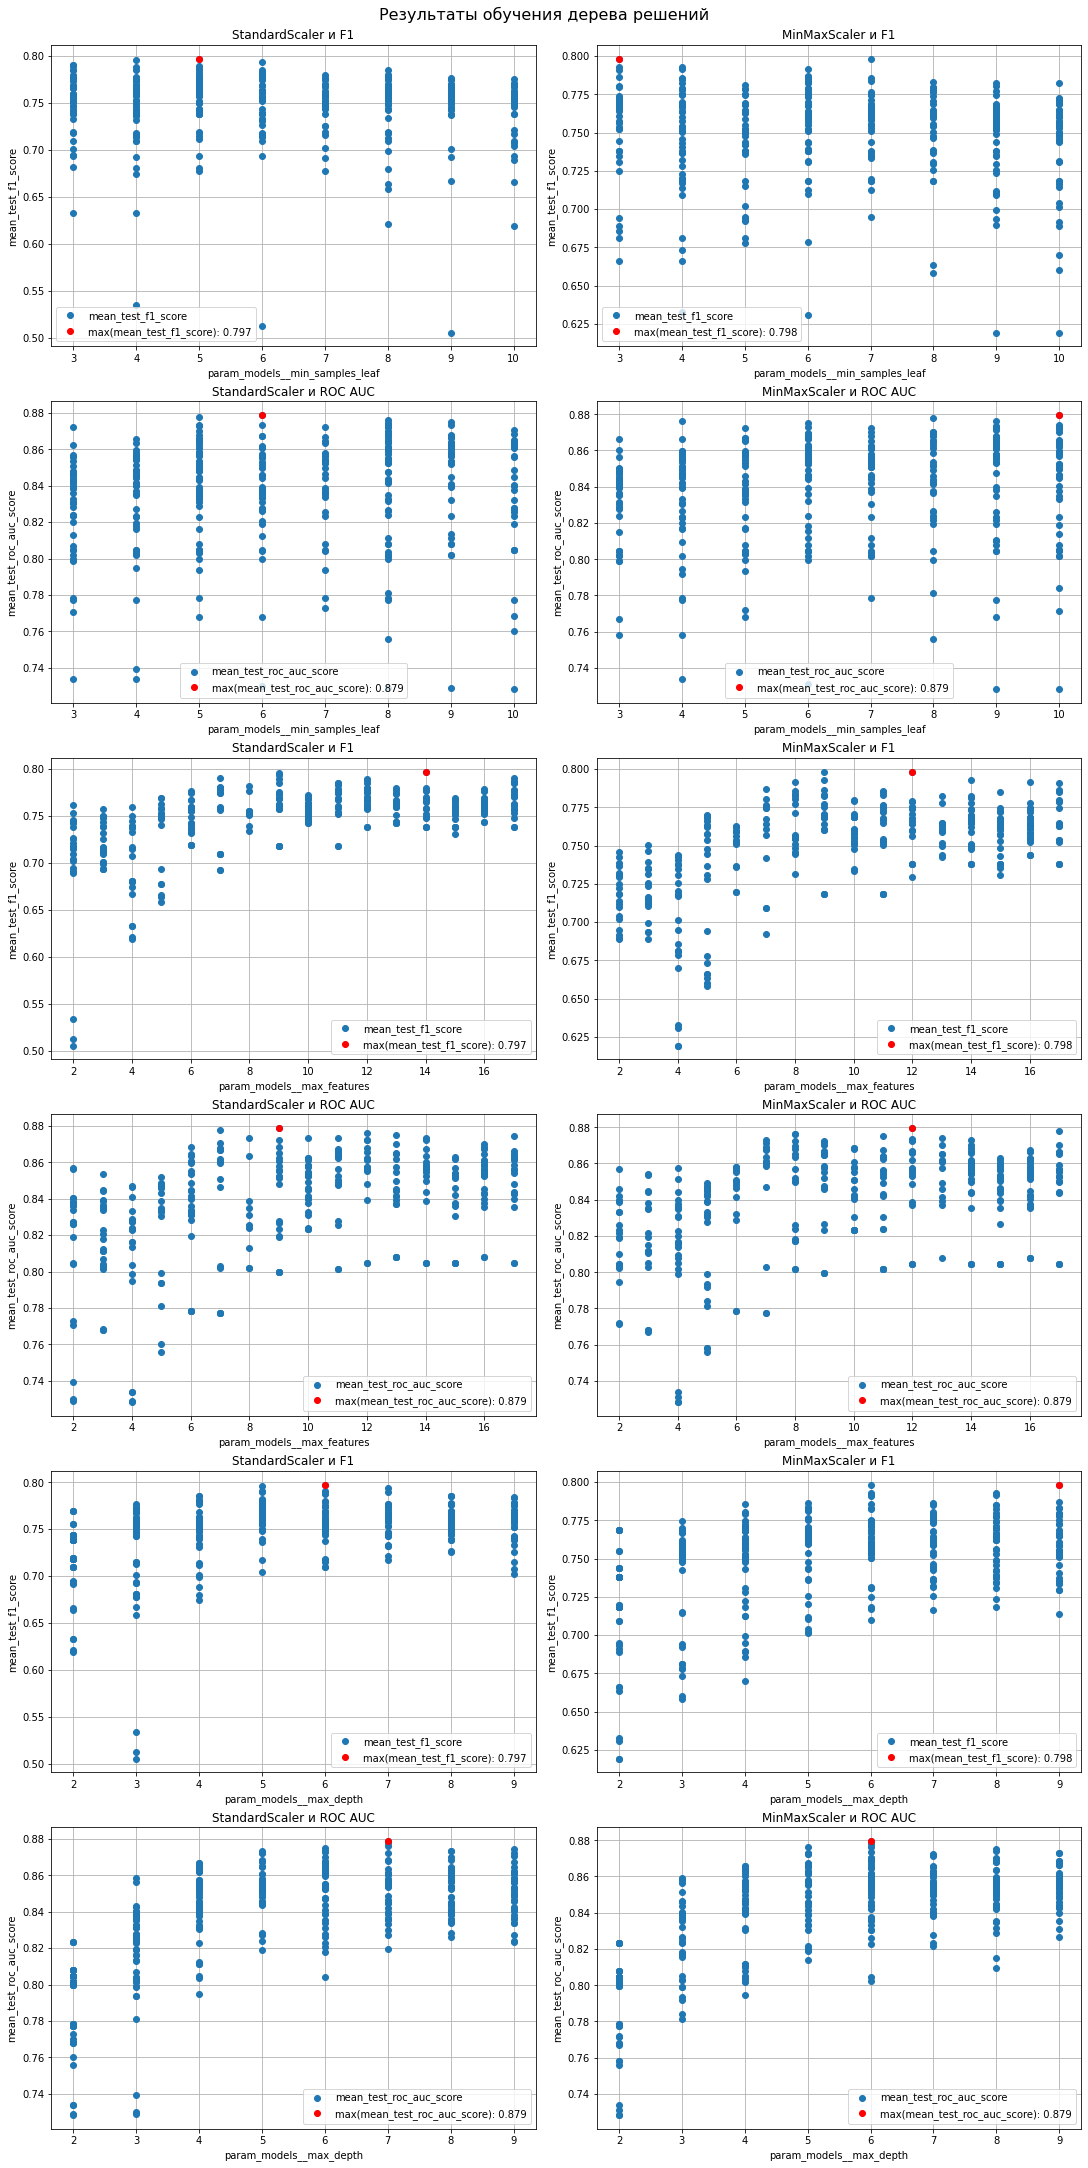

In [96]:
# Создадим все диаграммы
fig, axs = plt.subplots(6, 2, figsize=(15, 30), constrained_layout=True)

# Перечислим варианты для диаграмм (метод масштабирования, метрика, заголовок диаграммы)
plot_settings = [
    ('param_preprocessor__num', StandardScaler(), 'mean_test_f1_score', 
     'StandardScaler и F1', 'param_models__min_samples_leaf'),
    ('param_preprocessor__num', MinMaxScaler(), 'mean_test_f1_score', 
     'MinMaxScaler и F1', 'param_models__min_samples_leaf'),
    ('param_preprocessor__num', StandardScaler(), 'mean_test_roc_auc_score', 
     'StandardScaler и ROC AUC', 'param_models__min_samples_leaf'),
    ('param_preprocessor__num', MinMaxScaler(), 'mean_test_roc_auc_score', 
     'MinMaxScaler и ROC AUC', 'param_models__min_samples_leaf'),
    ('param_preprocessor__num', StandardScaler(), 'mean_test_f1_score', 
     'StandardScaler и F1', 'param_models__max_features'),
    ('param_preprocessor__num', MinMaxScaler(), 'mean_test_f1_score', 
     'MinMaxScaler и F1', 'param_models__max_features'),
    ('param_preprocessor__num', StandardScaler(), 'mean_test_roc_auc_score', 
     'StandardScaler и ROC AUC', 'param_models__max_features'),
    ('param_preprocessor__num', MinMaxScaler(), 'mean_test_roc_auc_score', 
     'MinMaxScaler и ROC AUC', 'param_models__max_features'),
    ('param_preprocessor__num', StandardScaler(), 'mean_test_f1_score', 
     'StandardScaler и F1', 'param_models__max_depth'),
    ('param_preprocessor__num', MinMaxScaler(), 'mean_test_f1_score', 
     'MinMaxScaler и F1', 'param_models__max_depth'),
    ('param_preprocessor__num', StandardScaler(), 'mean_test_roc_auc_score', 
     'StandardScaler и ROC AUC', 'param_models__max_depth'),
    ('param_preprocessor__num', MinMaxScaler(), 'mean_test_roc_auc_score', 
     'MinMaxScaler и ROC AUC', 'param_models__max_depth')
]

# Создадим каждую диаграмму
for ax, (preprocessor_label, scaler, metric, title, hyperpar) in zip(axs.ravel(), plot_settings):
    # Выделим необходимые данные
    ploted_results = cv_results[cv_results[preprocessor_label].astype('str') == str(scaler)]
    
    # Построим диаграмму
    ax.plot(ploted_results[hyperpar], ploted_results[metric], 'o', label=f'{metric}')
    
    # Выделим точку с максимальным значением метрики
    max_index = ploted_results.loc[~ploted_results[hyperpar].isna(), metric].idxmax()
    max_x = ploted_results.loc[max_index, hyperpar]
    max_y = ploted_results.loc[max_index, metric]
    ax.plot(max_x, max_y, 'ro', color='r', label=f'max({metric}): {max_y:.3f}')
    
    # Оформление
    ax.set_xlabel(hyperpar)
    ax.set_ylabel(metric)
    ax.legend()
    ax.set_title(title)
    ax.grid(True)

fig.suptitle('Результаты обучения дерева решений', fontsize=16)
plt.show()

Мы видим, что в целом результаты деревьев решений несколько хуже, чем логистической регрессии - максимальный размер метрики F1 = 0.8, ROC AUC = 0.88. Тем не менее, по F1 модель предпочитает деревья с небольшим размером выборки в листьях; использование всех входных признаков; глубину деревьев 6. А по ROC AUC модель предпочитает деревья с большим размером выборки в листьях; 6-9 входных признаков; глубину 9. Однако в целом перформанс моделей ниже, чем у логистической регрессии, поэтому есть смысл отбросить этот тип моделей.

Посмотрим на метод ближайших соседей:

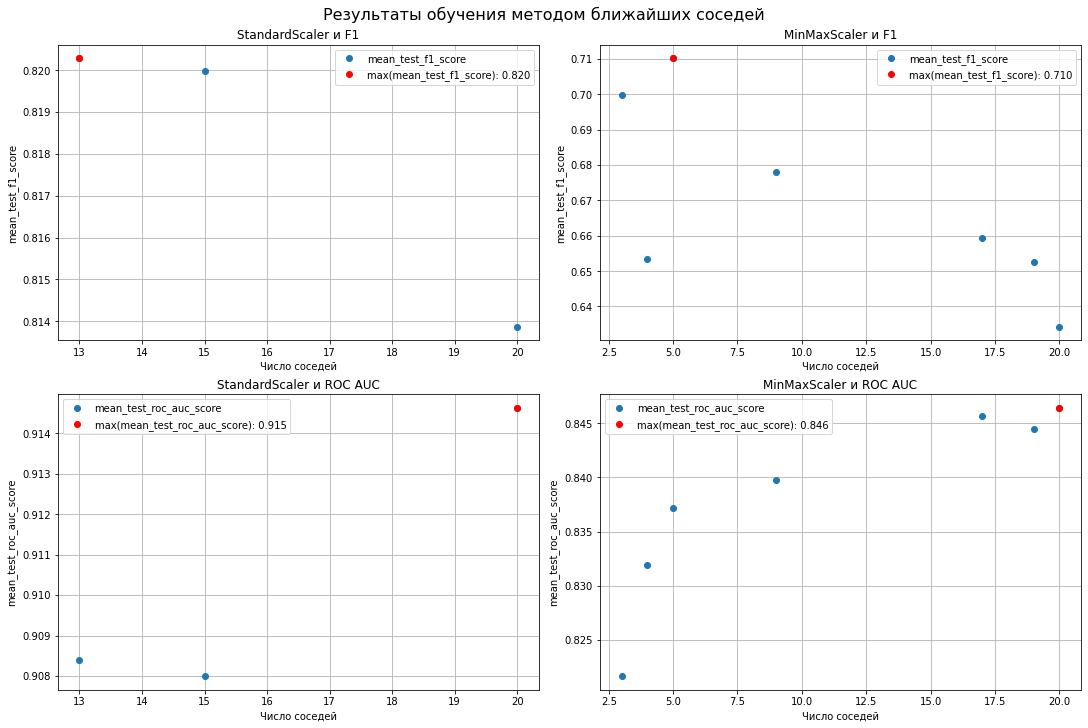

In [97]:
# Создадим все диаграммы
fig, axs = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=True)

# Перечислим варианты для диаграмм (метод масштабирования, метрика, заголовок диаграммы)
plot_settings = [
    ('param_preprocessor__num', StandardScaler(), 'mean_test_f1_score', 'StandardScaler и F1'),
    ('param_preprocessor__num', MinMaxScaler(), 'mean_test_f1_score', 'MinMaxScaler и F1'),
    ('param_preprocessor__num', StandardScaler(), 'mean_test_roc_auc_score', 'StandardScaler и ROC AUC'),
    ('param_preprocessor__num', MinMaxScaler(), 'mean_test_roc_auc_score', 'MinMaxScaler и ROC AUC')
]

# Создадим каждую диаграмму
for ax, (preprocessor_label, scaler, metric, title) in zip(axs.ravel(), plot_settings):
    # Выделим необходимые данные
    ploted_results = cv_results[cv_results[preprocessor_label].astype('str') == str(scaler)]
    
    # Построим диаграмму
    ax.plot(ploted_results['param_models__n_neighbors'], ploted_results[metric], 'o', label=f'{metric}')
    
    # Выделим точку с максимальным значением метрики
    max_index = ploted_results.loc[~ploted_results['param_models__n_neighbors'].isna(), metric].idxmax()
    max_x = ploted_results.loc[max_index, 'param_models__n_neighbors']
    max_y = ploted_results.loc[max_index, metric]
    ax.plot(max_x, max_y, 'ro', color='r', label=f'max({metric}): {max_y:.3f}')
    
    # Оформление
    ax.set_xlabel('Число соседей')
    ax.set_ylabel(metric)
    ax.legend()
    ax.set_title(title)
    ax.grid(True)

fig.suptitle('Результаты обучения методом ближайших соседей', fontsize=16)
plt.show()

Не так много моделей обучено этим методом, однако мы видим, что модель предпочитает StandardScaler, а также что максимум в районе 13 соседей (но возможно, и меньше) - это можно оценить в дальнейшем. F1 метрика модели немного выше логистической регрессии (0.832), а ROC AUC - на уровне логистической регрессии (0.904).

Посмотрим теперь на результаты машины опорных векторов:

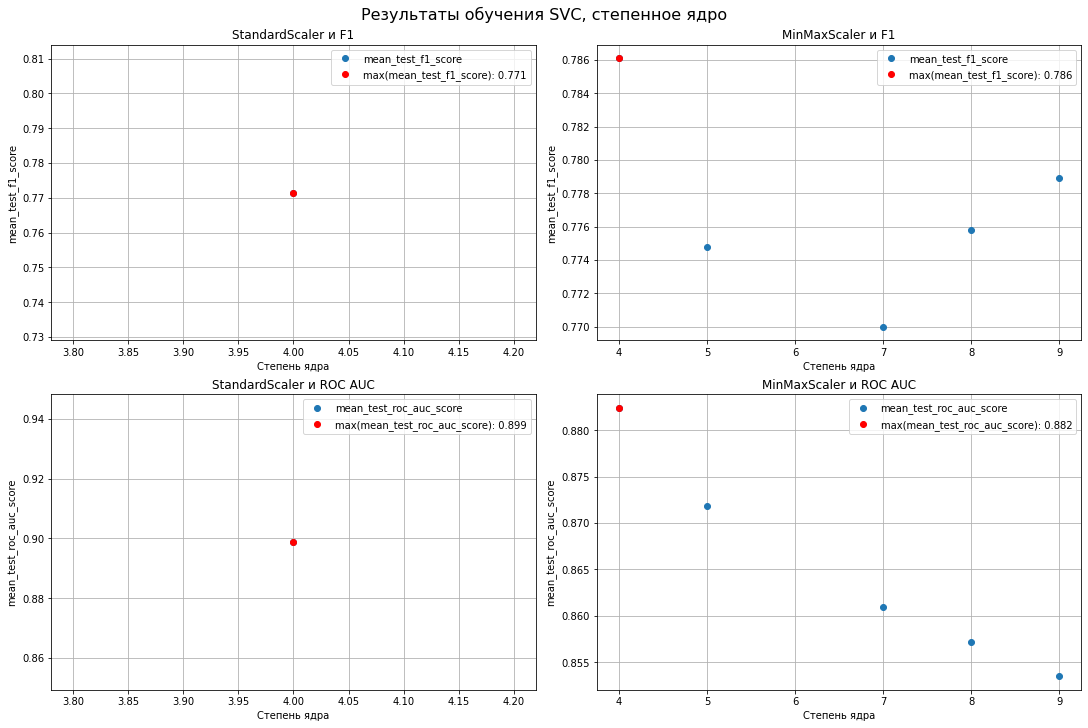

In [98]:
# Создадим все диаграммы
fig, axs = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=True)

# Перечислим варианты для диаграмм (метод масштабирования, метрика, заголовок диаграммы)
plot_settings = [
    ('param_preprocessor__num', StandardScaler(), 'mean_test_f1_score', 'StandardScaler и F1'),
    ('param_preprocessor__num', MinMaxScaler(), 'mean_test_f1_score', 'MinMaxScaler и F1'),
    ('param_preprocessor__num', StandardScaler(), 'mean_test_roc_auc_score', 'StandardScaler и ROC AUC'),
    ('param_preprocessor__num', MinMaxScaler(), 'mean_test_roc_auc_score', 'MinMaxScaler и ROC AUC')
]

# Создадим каждую диаграмму
for ax, (preprocessor_label, scaler, metric, title) in zip(axs.ravel(), plot_settings):
    # Выделим необходимые данные
    ploted_results = cv_results[cv_results[preprocessor_label].astype('str') == str(scaler)]
    
    # Построим диаграмму
    ax.plot(ploted_results['param_models__degree'], ploted_results[metric], 'o', label=f'{metric}')
    
    # Выделим точку с максимальным значением метрики
    max_index = ploted_results.loc[~ploted_results['param_models__degree'].isna(), metric].idxmax()
    max_x = ploted_results.loc[max_index, 'param_models__degree']
    max_y = ploted_results.loc[max_index, metric]
    ax.plot(max_x, max_y, 'ro', color='r', label=f'max({metric}): {max_y:.3f}')
    
    # Оформление
    ax.set_xlabel('Степень ядра')
    ax.set_ylabel(metric)
    ax.legend()
    ax.set_title(title)
    ax.grid(True)

fig.suptitle('Результаты обучения SVC, степенное ядро', fontsize=16)
plt.show()

Моделей обучено очень мало (а с другим ядром вообще не обучено), так что стоит оценить отдельно.

Обновим параметры моделей и посмотрим на результаты заново:

In [99]:
param_grid = [
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 15),
        'preprocessor__num': [StandardScaler()]   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=seed, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': 10 ** np.linspace(-1, 1, num=10),
        'preprocessor__num': [StandardScaler()]  
    },
    
    # словарь для модели SVC(), kernel='poly'
    {
        'models': [SVC(
            probability= True,
            random_state=seed,
            kernel='poly'
        )],
        'models__degree': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },
    
    # словарь для модели SVC(), kernel='rbf'
    {
        'models': [SVC(
            probability= True,
            random_state=seed,
            kernel='rbf'
        )],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    }
]

In [100]:
grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=scoring,
    n_jobs=-1,
    refit='f1_score'
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False)),
                                                                                         ('imputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['service_type',
                                                                          'message_consent',
     

Посмотрим на лучшую модель:

In [101]:
print('Лучшие параметры', grid_search.best_params_)
print('Лучшая метрика F1', grid_search.best_score_)

Лучшие параметры {'models': SVC(probability=True, random_state=42), 'preprocessor__num': StandardScaler()}
Лучшая метрика F1 0.8342970871680265


In [102]:
cv_results = pd.DataFrame(grid_search.cv_results_)

Построим графики с результатами моделей:

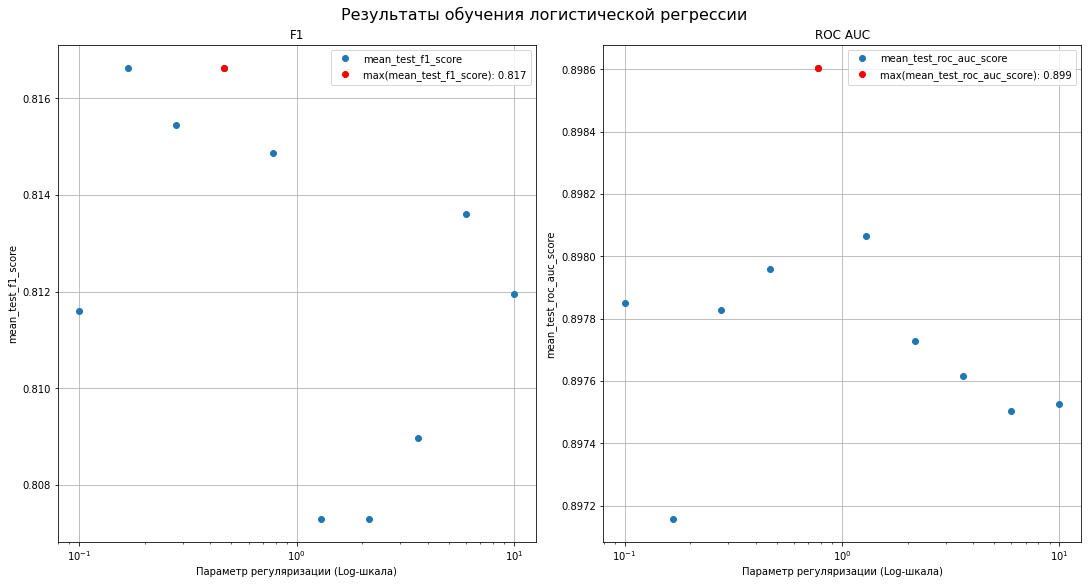

In [103]:
# Создадим все диаграммы
fig, axs = plt.subplots(1, 2, figsize=(15, 8), constrained_layout=True)

# Перечислим варианты для диаграмм (метод масштабирования, метрика, заголовок диаграммы)
plot_settings = [
    ('mean_test_f1_score', 'F1'),
    ('mean_test_roc_auc_score', 'ROC AUC'),
]

# Создадим каждую диаграмму
for ax, (metric, title) in zip(axs.ravel(), plot_settings):

    # Построим диаграмму
    ax.plot(cv_results['param_models__C'], cv_results[metric], 'o', label=f'{metric}')
    
    # Выделим точку с максимальным значением метрики
    max_index = cv_results.loc[~cv_results['param_models__C'].isna(), metric].idxmax()
    max_x = cv_results.loc[max_index, 'param_models__C']
    max_y = cv_results.loc[max_index, metric]
    ax.plot(max_x, max_y, 'ro', color='r', label=f'max({metric}): {max_y:.3f}')
    
    # Оформление
    ax.set_xscale('log')
    ax.set_xlabel('Параметр регуляризации (Log-шкала)')
    ax.set_ylabel(metric)
    ax.legend()
    ax.set_title(title)
    ax.grid(True)

fig.suptitle('Результаты обучения логистической регрессии', fontsize=16)
plt.show()

Мы видим, что пик результатов близко к параметру регуляризации C = 0.1 (второе-третье значение параметра). Однако F1 = 0.825, что меньше лучшей модели.

Посмотрим теперь на результаты метода ближайших соседей:

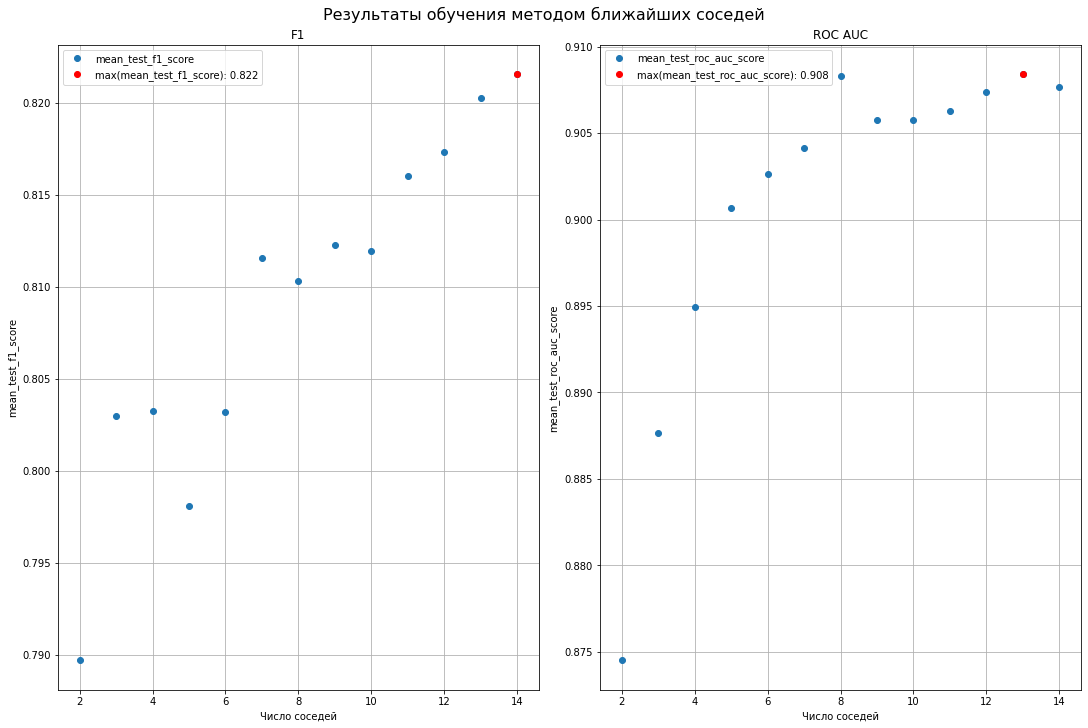

In [104]:
# Создадим все диаграммы
fig, axs = plt.subplots(1, 2, figsize=(15, 10), constrained_layout=True)

# Перечислим варианты для диаграмм (метод масштабирования, метрика, заголовок диаграммы)
plot_settings = [
    ('mean_test_f1_score', 'F1'),
    ('mean_test_roc_auc_score', 'ROC AUC')
]

# Создадим каждую диаграмму
for ax, (metric, title) in zip(axs.ravel(), plot_settings):
    # Построим диаграмму
    ax.plot(cv_results['param_models__n_neighbors'], cv_results[metric], 'o', label=f'{metric}')
    
    # Выделим точку с максимальным значением метрики
    max_index = cv_results.loc[~cv_results['param_models__n_neighbors'].isna(), metric].idxmax()
    max_x = cv_results.loc[max_index, 'param_models__n_neighbors']
    max_y = cv_results.loc[max_index, metric]
    ax.plot(max_x, max_y, 'ro', color='r', label=f'max({metric}): {max_y:.3f}')
    
    # Оформление
    ax.set_xlabel('Число соседей')
    ax.set_ylabel(metric)
    ax.legend()
    ax.set_title(title)
    ax.grid(True)

fig.suptitle('Результаты обучения методом ближайших соседей', fontsize=16)
plt.show()

Метод ближайших соседей показывает лучший результат, чем логистическая регрессия, с лучшим параметром К = 13.

Посмотрим теперь на результаты SVC с полиномиальным ядром:

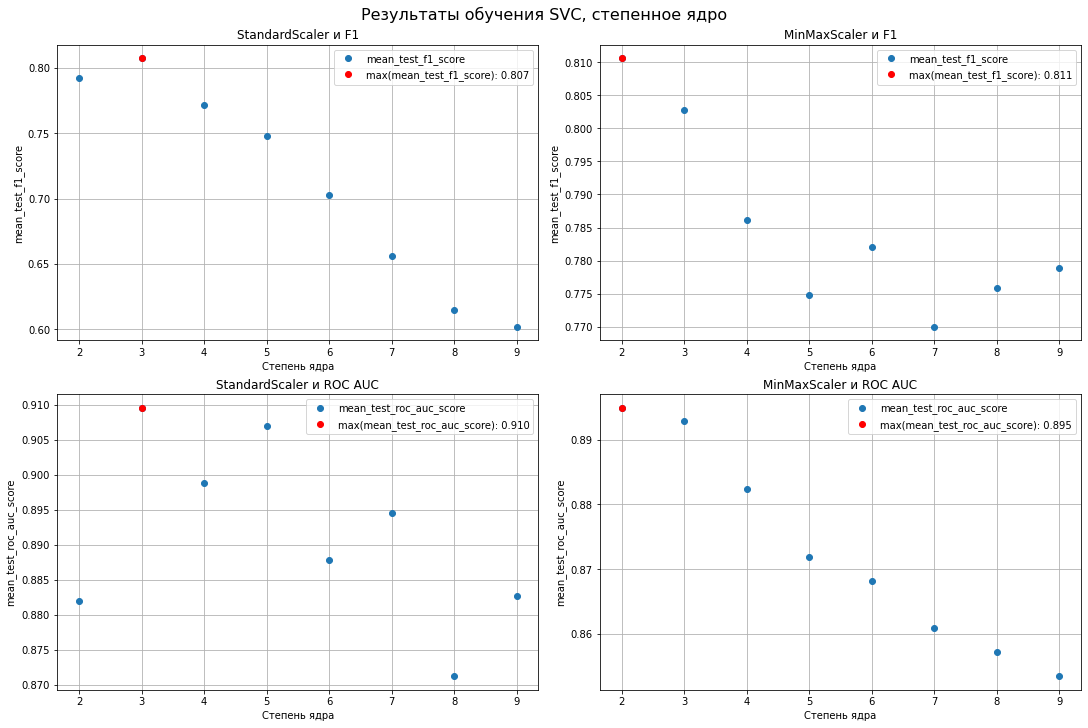

In [105]:
# Создадим все диаграммы
fig, axs = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=True)

# Перечислим варианты для диаграмм (метод масштабирования, метрика, заголовок диаграммы)
plot_settings = [
    ('param_preprocessor__num', StandardScaler(), 'mean_test_f1_score', 'StandardScaler и F1'),
    ('param_preprocessor__num', MinMaxScaler(), 'mean_test_f1_score', 'MinMaxScaler и F1'),
    ('param_preprocessor__num', StandardScaler(), 'mean_test_roc_auc_score', 'StandardScaler и ROC AUC'),
    ('param_preprocessor__num', MinMaxScaler(), 'mean_test_roc_auc_score', 'MinMaxScaler и ROC AUC')
]

# Создадим каждую диаграмму
for ax, (preprocessor_label, scaler, metric, title) in zip(axs.ravel(), plot_settings):
    # Выделим необходимые данные
    ploted_results = cv_results[cv_results[preprocessor_label].astype('str') == str(scaler)]
    
    # Построим диаграмму
    ax.plot(ploted_results['param_models__degree'], ploted_results[metric], 'o', label=f'{metric}')
    
    # Выделим точку с максимальным значением метрики
    max_index = ploted_results.loc[~ploted_results['param_models__degree'].isna(), metric].idxmax()
    max_x = ploted_results.loc[max_index, 'param_models__degree']
    max_y = ploted_results.loc[max_index, metric]
    ax.plot(max_x, max_y, 'ro', color='r', label=f'max({metric}): {max_y:.3f}')
    
    # Оформление
    ax.set_xlabel('Степень ядра')
    ax.set_ylabel(metric)
    ax.legend()
    ax.set_title(title)
    ax.grid(True)

fig.suptitle('Результаты обучения SVC, степенное ядро', fontsize=16)
plt.show()

Модель предпочитает minmaxscaler и ядро степени 2, однако метрики чуть ниже, чем у метода ближайших соседей. Посмотрим теперь на SVC с ядром RBF. Т.к. у нас всего 2 результата, выведем их в табличной форме:

In [108]:
cv_results.loc[cv_results['param_models'].astype('str') == 'SVC(probability=True, random_state=42)', 
               ['param_models', 'param_preprocessor__num','mean_test_f1_score', 'mean_test_roc_auc_score']]

param_models param_preprocessor__num  \
47  SVC(probability=True, random_state=42)        StandardScaler()   
48  SVC(probability=True, random_state=42)          MinMaxScaler()   
49  SVC(probability=True, random_state=42)             passthrough   

    mean_test_f1_score  mean_test_roc_auc_score  
47            0.834297                 0.914913  
48            0.820866                 0.900804  
49            0.000000                 0.747034

Таким образом, лучше моделью по метрикам является машина опорных векторов с StandardScaler и метриками F1 = 0.834, ROC AUC = 0.915. Построим финальную модель на всей тренировочной выборке:

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ⚠️\
<span style="color: darkorange"> Лучшая модель обученная на всех обучающих данных уже есть в `grid_search.best_estimator_`

In [111]:
# Препроцессим данные для модели:
col_names = np.concatenate([grid_search.best_estimator_['preprocessor'].transformers_[0][1]\
   .named_steps['ohe'].get_feature_names(ohe_columns), np.array(ord_columns), np.array(num_columns)])

X_train_processed = pd.DataFrame(grid_search.best_estimator_['preprocessor'].fit_transform(X_train),
                                columns=col_names)
X_test_processed = pd.DataFrame(grid_search.best_estimator_['preprocessor'].transform(X_test),
                                columns=col_names)


In [112]:
# Построим финальную модель, для shap нужен параметр для расчета вероятностей
best_model = grid_search.best_estimator_['models']
best_model.fit(X_train_processed, y_train)

SVC(probability=True, random_state=42)

Посчитаем метрики на тестовой выборке:

In [113]:
y_pred = best_model.predict(X_test_processed)
print(f'F1 = {f1_score(y_test, y_pred):.3f}')
y_pred_proba = best_model.predict_proba(X_test_processed)
print(f'ROC AUC = {roc_auc_score(y_test, y_pred_proba[:, 1]):.3f}')

F1 = 0.873
ROC AUC = 0.917


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>roc_auc нужно считать по вероятностям классов
```python
probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))
```
Самое подробное объяснение метрики, что я видел на русском языке, можно посмотреть здесь: https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-площадь-под-кривой-ошибок \
А внутри кросс-валидации мы просто указываем метрику ROC_AUC и там никаких вероятностей нам не нужно. Так как эта метрика не дифференцируема на всем промежутке (кажется, разрыв в нуле), то там разработчики кросс-валидации хитро меняют ее на эквивалент Gini, так как Gini = 2 ×AUC_ROC – 1 (можно почитать по ссылке выше)
</font>

Мы видим, что F1 на тесте даже немного выше метрики кросс-валидации, а ROC AUC примерно таким же. Давайте посмотрим теперь на то, какие признаки модели наиболее важны.

## Анализ важности признаков

Для этого используем модуль `shap`. Посмотрим сначала на график beeswarm и столбчатую диаграмму:

In [114]:
explainer = shap.KernelExplainer(best_model.predict_proba, shap.sample(X_test_processed, 100))
shap_values = explainer(X_test_processed) 

  0%|          | 0/325 [00:00<?, ?it/s]

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ⚠️\
<span style="color: darkorange"> Для ускорения расчётов можно применять сэмплирование `shap.sample()` или `shap.kmeans()`.</span>

<span style="color: purple; font-weight: bold">Тут вопрос на самом деле, какие значения K в `shap.sample` лучше использовать. Вроде универсальный ответ - 100, но это зависит (и 100 не то, чтобы сильно быстрее). Вообще этот раздел теории на платформе не прям супер написан, например, нигде не пишется, что это супер медленная процедура, и как с этим действовать)</span>

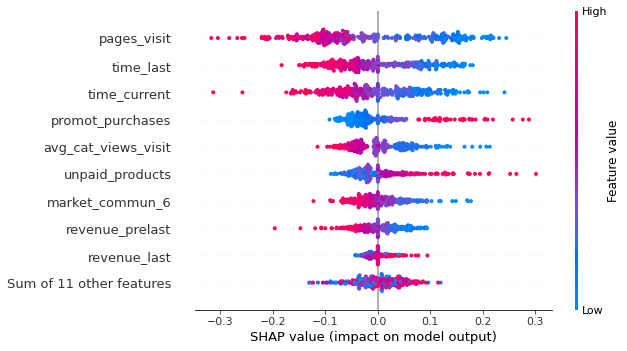

In [115]:
shap.plots.beeswarm(shap_values[..., 1])

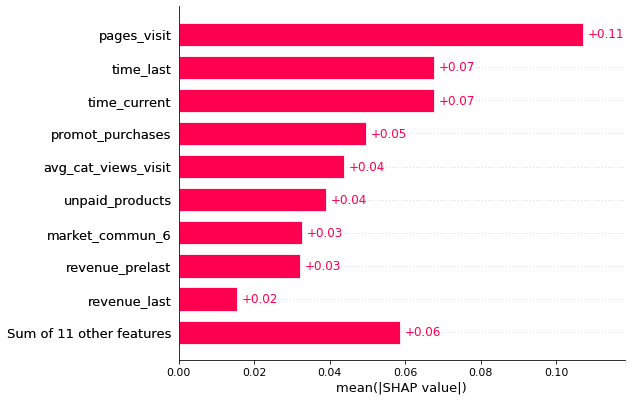

In [116]:
shap.plots.bar(shap_values[...,1]) 

Мы видим, что наиболее влиятельные переменные для прогноза снижения покупательской способностью - это:
1. `pages_visit` - чем больше покупатель посещает страниц за визит, тем меньше вероятность снижения покупательской способности
2. `time_last`, `time_prelast` - чем больше времени на сайте проводит покупатель, тем меньше вероятность снижения покупательской способности
3. `promot_purchases` - чем выше доля покупок по акции, тем выше вероятность снижения покупательской способности
4. `avg_cat_views_visit` - чем больше просмотров категорий за визит, тем меньше вероятность снижения покупательской способности
5. `unpaid_products` - чем больше в корзине неоплаченных продуктов, тем выше вероятность снижения покупательской способности
6. `market_commun_6` - чем больше маркетинговой коммуникации за последние полгода, тем меньше вероятность снижения покупательской способности
7. `revenue_prelast` - чем выше выручка с покупателя 2 месяца назад, тем меньше вероятность снижения покупательской способности

Остальные переменные скорее не влияют на прогноз снижения покупательской способности: например, мы видим это на графике beeswarm на примере признака `revenue_last` - прогноз снижения покупательской способности там смешан (справа и слева присутствуют как красные, так и синие точки).

Из этого можно сделать следующий вывод: для того, чтобы покупательская способность не снижалась, нужно обращать внимание на активность покупателя на сайте и на маркетинговую активность - стараться вовлекать покупателей в активность на сайте. Однако не стоит сильно усердствовать с акционными товарами - они могут привлечь покупателей на краткий период, но при этом последующие активности у них упадут. Посмотрим теперь на сегмент таких покупателей:

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

## Сегментация покупателей

Давайте посмотрим подробнее на покупателей с высокой долей покупок по акции и высокой вероятностью снижения покупательской активности. Сначала выделим этот сегмент:

In [117]:
X_processed = pd.DataFrame(grid_search.best_estimator_['preprocessor'].fit_transform(X),
                                columns=col_names)
y_pred_all = best_model.predict_proba(X_processed)

In [121]:
market_data['y_pred_proba'] = y_pred_all[:, 1]

In [122]:
show_data(market_data)

id purchase_activity service_type message_consent  market_commun_6  \
0  215349         Снизилась      премиум              да              4.4   
1  215350         Снизилась     стандарт             нет              4.9   
2  215351         Снизилась     стандарт              да              3.2   
3  215352         Снизилась     стандарт             нет              5.1   
4  215353         Снизилась     стандарт              да              3.3   

  market_commun_1  register_days  promot_purchases            pop_cat  \
0               4            819              0.75   Товары для детей   
1               3            539              0.14  Домашний текстиль   
2               5            896              0.99   Товары для детей   
3               3           1064              0.94   Товары для детей   
4               4            762              0.26  Домашний текстиль   

   avg_cat_views_visit  unpaid_products  service_errors  pages_visit  \
0                    4                4               2            5   
1                    5                2               1            5   
2                    5                0               6            4   
3                    3                2               3            2   
4                    4                1               1            4   

   revenue_current  revenue_last  revenue_prelast  time_current  time_last  \
0           4971.6        5216.0           4472.0            10         12   
1           5058.4        5457.5           4826.0            13          8   
2           6610.4        6158.0           4793.0            13         11   
3           5872.5        5807.5           4594.0            11          8   
4           5388.5        4738.5           5124.0            10         10   

   profit  y_pred_proba  
0    4.16      0.981305  
1    3.13      0.450470  
2    4.87      0.873291  
3    4.21      0.977966  
4    3.95      0.762694

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1297 non-null   int64  
 1   purchase_activity    1297 non-null   object 
 2   service_type         1297 non-null   object 
 3   message_consent      1297 non-null   object 
 4   market_commun_6      1297 non-null   float64
 5   market_commun_1      1297 non-null   object 
 6   register_days        1297 non-null   int64  
 7   promot_purchases     1297 non-null   float64
 8   pop_cat              1297 non-null   object 
 9   avg_cat_views_visit  1297 non-null   int64  
 10  unpaid_products      1297 non-null   int64  
 11  service_errors       1297 non-null   int64  
 12  pages_visit          1297 non-null   int64  
 13  revenue_current      1297 non-null   float64
 14  revenue_last         1297 non-null   float64
 15  revenue_prelast      1297 non-null   f

Интересующих нас покупателей (с ненизкой прибылью и высокой вероятностью снижения покупательской способности), а затем выделим среди них тех, у кого высокая доля акционных покупок:

In [124]:
market_segment = market_data[(market_data['profit'] > market_data['profit'].mean() - market_data['profit'].std()) \
                  & (market_data['y_pred_proba'] > 0.7)]
show_data(market_segment)

id purchase_activity service_type message_consent  market_commun_6  \
0  215349         Снизилась      премиум              да              4.4   
2  215351         Снизилась     стандарт              да              3.2   
3  215352         Снизилась     стандарт             нет              5.1   
4  215353         Снизилась     стандарт              да              3.3   
5  215354         Снизилась     стандарт              да              5.1   

  market_commun_1  register_days  promot_purchases                pop_cat  \
0               4            819              0.75       Товары для детей   
2               5            896              0.99       Товары для детей   
3               3           1064              0.94       Товары для детей   
4               4            762              0.26      Домашний текстиль   
5               3            431              0.23  Косметика и аксесуары   

   avg_cat_views_visit  unpaid_products  service_errors  pages_visit  \
0                    4                4               2            5   
2                    5                0               6            4   
3                    3                2               3            2   
4                    4                1               1            4   
5                    2                3               7            2   

   revenue_current  revenue_last  revenue_prelast  time_current  time_last  \
0           4971.6        5216.0           4472.0            10         12   
2           6610.4        6158.0           4793.0            13         11   
3           5872.5        5807.5           4594.0            11          8   
4           5388.5        4738.5           5124.0            10         10   
5           5869.6        5685.0           4503.0            12         11   

   profit  y_pred_proba  
0    4.16      0.981305  
2    4.87      0.873291  
3    4.21      0.977966  
4    3.95      0.762694  
5    3.62      0.895263

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 1285
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   328 non-null    int64  
 1   purchase_activity    328 non-null    object 
 2   service_type         328 non-null    object 
 3   message_consent      328 non-null    object 
 4   market_commun_6      328 non-null    float64
 5   market_commun_1      328 non-null    object 
 6   register_days        328 non-null    int64  
 7   promot_purchases     328 non-null    float64
 8   pop_cat              328 non-null    object 
 9   avg_cat_views_visit  328 non-null    int64  
 10  unpaid_products      328 non-null    int64  
 11  service_errors       328 non-null    int64  
 12  pages_visit          328 non-null    int64  
 13  revenue_current      328 non-null    float64
 14  revenue_last         328 non-null    float64
 15  revenue_prelast      328 non-null    fl

<font color='blue'><b>Комментарий ревьюера : </b></font> ❌\
<font color='red'> Нужно выделить сегмент по двум переменным (вероятность снижения и прибыль), для этого определяем и аргументируем два порога по этим осям, проще всего это посмотреть на рассеивание.
![](https://i.postimg.cc/DZ3GSqwK/102458.png)

Это, условно, те с кем имеет смысл работать.\
Затем определяем группу клиентов из сегмента (например по акционным покупкам) и сравниваем этих клиентов со всеми остальньнымим по другим факторам, для выявления различий (можно строить парные графики или накладывать гистограммы). На основании сравнения формируем рекомендации.</font>

<span style="color: purple; font-weight: bold">Хм, но в задании написано вот так (там сегмент с высокой вероятностью снижения и высокой прибылью - это лишь один из примеров):<br>
Выделите сегмент покупателей, проанализируйте его и предложите, как увеличить его покупательскую активность. Используйте данные моделирования, данные о прибыли покупателей и исходные данные (если понадобятся). По желанию вы можете проанализировать больше одного сегмента.<br> Ниже несколько примеров сегментов, но вы также можете выделить свой:<ul>
    <li>Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.</li>
    <li>Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.</li>
    <li>Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».</li>
    <li>Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.</li></ul></span>

<span style="color: purple; font-weight: bold">Но в целом это наверное более логично, так что попробую так</span>

Выделим среди покупателей сегмент с высокой долей акционных покупок:

In [125]:
market_segment['segment'] = (market_segment['promot_purchases'] > 0.8).astype('int')

In [126]:
print('Количество покупателей в сегменте:', market_segment[market_segment['segment'] == 1].shape[0])

Количество покупателей в сегменте: 98


Посмотрим на особенности покупателей этого сегмента по тем признакам, которые важны для финальной модели. Для этого сравним графически покупателей из сегмента с другими покупателями, а также посмотрим на основные статистики по этим переменным:

In [127]:
market_segment.groupby('segment')['pages_visit'].describe()

count      mean       std  min  25%  50%  75%   max
segment                                                     
0        230.0  4.208696  1.975817  1.0  3.0  4.0  5.0  11.0
1         98.0  4.255102  2.001604  1.0  3.0  4.0  5.0  13.0

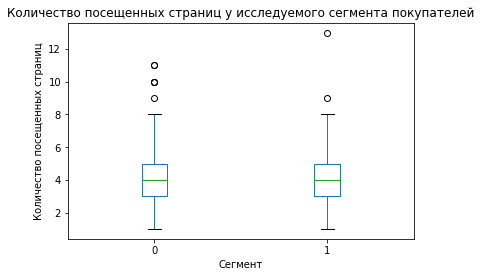

In [128]:
market_segment.boxplot(column='pages_visit', by='segment', grid=False)
plt.title('Количество посещенных страниц у исследуемого сегмента покупателей')
plt.suptitle('')
plt.xlabel('Сегмент')
plt.ylabel('Количество посещенных страниц')

plt.show()

Мы видим, что среди высокоприбыльных покупателей количество страниц, посещенное ими за визит, примерно совпадает в сегменте покупателей с высокой долей акционных покупок и у других покупателей. Однако это почти на 4 страницы ниже, чем в среднем по выборке (см. исследовательский анализ данных). Посмотрим на время на сайте за предыдущий месяц:

In [129]:
market_segment.groupby('segment')['time_last'].describe()

count       mean       std  min  25%   50%   75%   max
segment                                                        
0        230.0   9.778261  2.614781  5.0  8.0  10.0  11.0  18.0
1         98.0  10.030612  2.538179  5.0  8.0  10.0  12.0  17.0

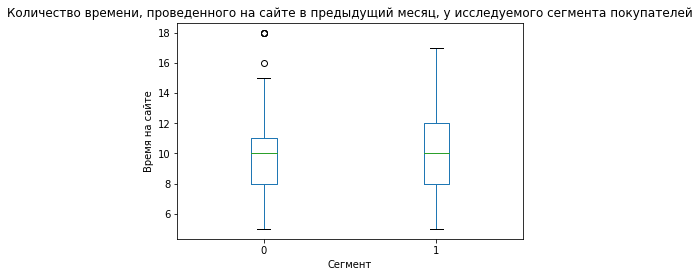

In [130]:
market_segment.boxplot(column='time_last', by='segment', grid=False)
plt.title('Количество времени, проведенного на сайте в предыдущий месяц, у исследуемого сегмента покупателей')
plt.suptitle('')
plt.xlabel('Сегмент')
plt.ylabel('Время на сайте')

plt.show()

Здесь мы видим похожую картину - в среднем покупатели из исследуемого сегмента провели на сайте около 10 минут за предыдущий месяц, и это немного больше, чем другие категории покупателей. В целом по обоим периодам оба этих сегмента проводят на 3 минуты меньше времени на сайте, чем остальные покупатели в среднем. Посмотрим на данные по настоящему месяцу:

In [131]:
market_segment.groupby('segment')['time_current'].describe()

count       mean       std  min   25%   50%   75%   max
segment                                                         
0        230.0  10.091304  2.784143  4.0  8.25  10.0  12.0  20.0
1         98.0  10.336735  2.511597  4.0  9.00  10.0  12.0  19.0

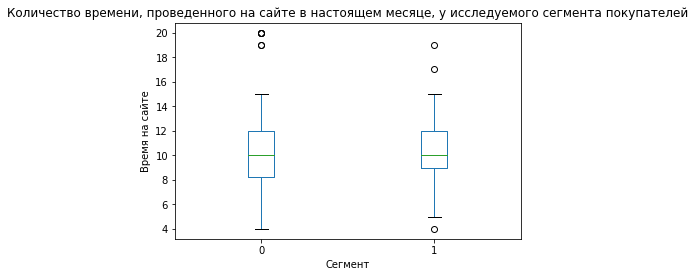

In [132]:
market_segment.boxplot(column='time_current', by='segment', grid=False)
plt.title('Количество времени, проведенного на сайте в настоящем месяце, у исследуемого сегмента покупателей')
plt.suptitle('')
plt.xlabel('Сегмент')
plt.ylabel('Время на сайте')

plt.show()

Здесь мы видим похожую картину, но время у двух групп покупателей в среднем выросло на 0.3 минуты. Посмотрим на данные по количество просмотренных категорий:

In [133]:
market_segment.groupby('segment')['avg_cat_views_visit'].describe()

count      mean      std  min  25%  50%  75%  max
segment                                                   
0        230.0  2.434783  1.16447  1.0  2.0  2.0  3.0  6.0
1         98.0  2.591837  1.19135  1.0  2.0  2.0  3.0  6.0

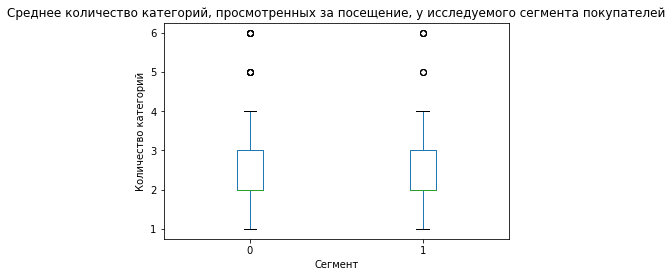

In [134]:
market_segment.boxplot(column='avg_cat_views_visit', by='segment', grid=False)
plt.title('Среднее количество категорий, просмотренных за посещение, у исследуемого сегмента покупателей')
plt.suptitle('')
plt.xlabel('Сегмент')
plt.ylabel('Количество категорий')

plt.show()

Здесь мы видим, что разницы между сегментами практически нет: покупатели в обоих сегментах смотрят 2-2.5 категории за визит, но в целом это примерно на 1 категорию меньше, чем во всей выборке. Посмотрим на количество неоплаченных продуктов в корзине:

In [135]:
market_segment.groupby('segment')['unpaid_products'].describe()

count      mean       std  min  25%  50%   75%   max
segment                                                      
0        230.0  4.073913  2.173424  0.0  2.0  4.0  5.75  10.0
1         98.0  4.224490  2.602658  0.0  2.0  4.0  6.00  10.0

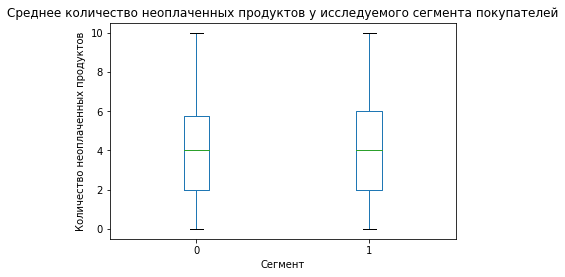

In [136]:
market_segment.boxplot(column='unpaid_products', by='segment', grid=False)
plt.title('Среднее количество неоплаченных продуктов у исследуемого сегмента покупателей')
plt.suptitle('')
plt.xlabel('Сегмент')
plt.ylabel('Количество неоплаченных продуктов')

plt.show()

Если говорить про количество неоплаченных товаров в корзине, то у исследуемого сегмента покупателей их в среднем на 0.2 больше, чем у других покупателей. Также выше и разброс по количеству неоплаченных товаров, однако о какой-то большой разнице говорить не приходится. Посмотрим на различия в маркетинговой активности у сегментов:

In [137]:
market_segment.groupby('segment')['market_commun_6'].describe()

count      mean       std  min  25%  50%  75%  max
segment                                                    
0        230.0  3.535217  0.992603  0.9  3.0  3.7  4.1  5.6
1         98.0  3.483673  1.055246  0.9  3.0  3.8  4.1  5.6

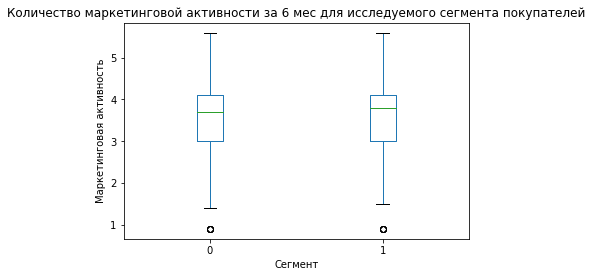

In [138]:
market_segment.boxplot(column='market_commun_6', by='segment', grid=False)
plt.title('Количество маркетинговой активности за 6 мес для исследуемого сегмента покупателей')
plt.suptitle('')
plt.xlabel('Сегмент')
plt.ylabel('Маркетинговая активность')

plt.show()

Мы видим, что в среднем покупатели из рассматриваемых сегментов получали примерно одинаковое количество маркетинговых сообщений за последние 6 месяцев, однако это в среднем меньше, чем общее количество сообщений (см. результаты исследовательского анализа). Посмотрим теперь на выручку за препредыдущий месяц:

In [139]:
market_segment.groupby('segment')['revenue_prelast'].describe()

count         mean         std     min     25%     50%      75%  \
segment                                                                    
0        230.0  4609.430435  257.555017  4102.0  4426.5  4607.0  4766.75   
1         98.0  4623.428571  253.135675  4098.0  4440.0  4653.5  4796.75   

            max  
segment          
0        5555.0  
1        5532.0

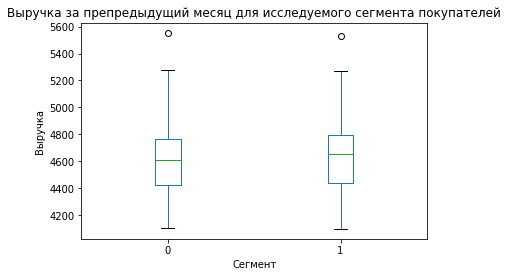

In [140]:
market_segment.boxplot(column='revenue_prelast', by='segment', grid=False)
plt.title('Выручка за препредыдущий месяц для исследуемого сегмента покупателей')
plt.suptitle('')
plt.xlabel('Сегмент')
plt.ylabel('Выручка')

plt.show()

В среднем выручка за препредыдущий месяц у покупателей данных сегментов составляет около 4600 руб., что на 200 руб. ниже среднего у всех покупателей. Можно сказать, что данная категория меньше покупает товаров, чем в среднем.

Посмотрим теперь на выручку за другие периоды:

In [141]:
market_segment.groupby('segment')['revenue_last'].describe()

count         mean         std     min      25%      50%       75%  \
segment                                                                       
0        230.0  5022.845652  843.845524  2909.0  4508.00  5137.75  5643.625   
1         98.0  4896.362245  815.828071  3146.0  4401.25  4924.00  5517.750   

            max  
segment          
0        6869.5  
1        6716.5

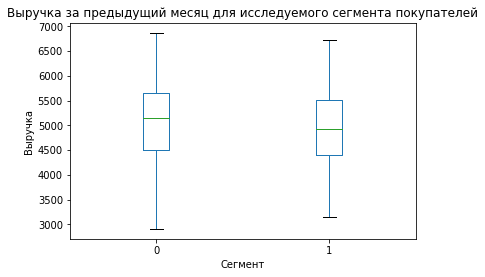

In [142]:
market_segment.boxplot(column='revenue_last', by='segment', grid=False)
plt.title('Выручка за предыдущий месяц для исследуемого сегмента покупателей')
plt.suptitle('')
plt.xlabel('Сегмент')
plt.ylabel('Выручка')

plt.show()

Мы видим, что выручка за предыдущий месяц в среднем выше, чем за препредыдущий, также выручка покупателей, которые покупают в основном акционные товары, ниже на 100 рублей, чем у других покупателей.

In [143]:
market_segment.groupby('segment')['revenue_current'].describe()

count         mean         std     min       25%      50%      75%  \
segment                                                                       
0        230.0  5372.970000  942.597371  2758.7  4643.525  5484.15  6067.70   
1         98.0  5188.979592  857.342564  3232.2  4597.700  5167.50  5722.55   

            max  
segment          
0        7605.3  
1        7799.4

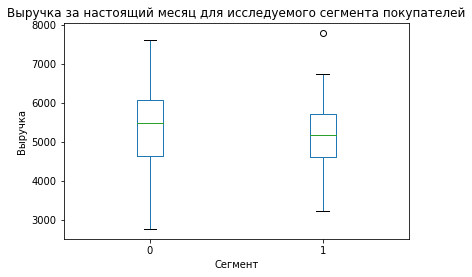

In [144]:
market_segment.boxplot(column='revenue_current', by='segment', grid=False)
plt.title('Выручка за настоящий месяц для исследуемого сегмента покупателей')
plt.suptitle('')
plt.xlabel('Сегмент')
plt.ylabel('Выручка')

plt.show()

Мы видим, что средний размер выручки опять же вырос по сравнению с предыдущим периодом, при этом разница между двумя группами составляет 200 руб. - покупатели, покупающие преимущественно акционные товары, приносят меньшую выручку, чем покупатели другой катеории.

Посмотрим теперь на то, как взаимосвязана прибыль в данных сегментах и важные переменные для модели:

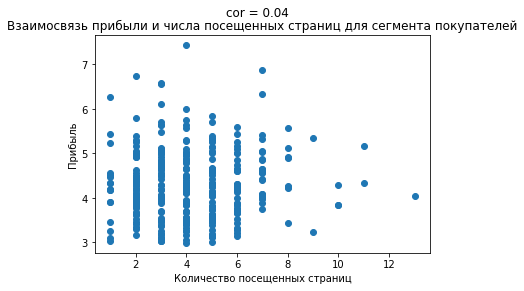

In [145]:
plt.title('Взаимосвязь прибыли и числа посещенных страниц для сегмента покупателей')
plt.suptitle(f'cor = {market_segment["profit"].corr(market_segment["pages_visit"]):.2f}')
plt.xlabel('Количество посещенных страниц')
plt.ylabel('Прибыль')
plt.plot(market_segment['pages_visit'], market_segment['profit'], 'o');

Мы видим, что прибыль от таких покупателей не изменяется с ростом числа посещенных страниц.

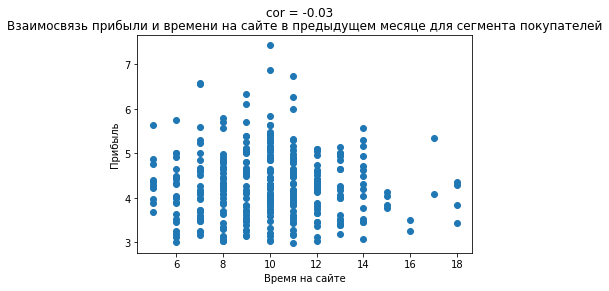

In [146]:
plt.title('Взаимосвязь прибыли и времени на сайте в предыдущем месяце для сегмента покупателей')
plt.suptitle(f'cor = {market_segment["profit"].corr(market_segment["time_last"]):.2f}')
plt.xlabel('Время на сайте')
plt.ylabel('Прибыль')
plt.plot(market_segment['time_last'], market_segment['profit'], 'o');

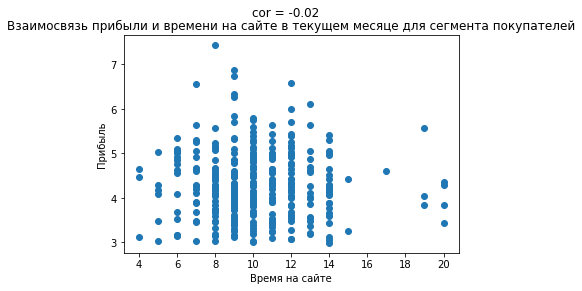

In [147]:
plt.title('Взаимосвязь прибыли и времени на сайте в текущем месяце для сегмента покупателей')
plt.suptitle(f'cor = {market_segment["profit"].corr(market_segment["time_current"]):.2f}')
plt.xlabel('Время на сайте')
plt.ylabel('Прибыль')
plt.plot(market_segment['time_current'], market_segment['profit'], 'o');

Время, проведенное на сайте за оба месяца, также не связано с прибылью.

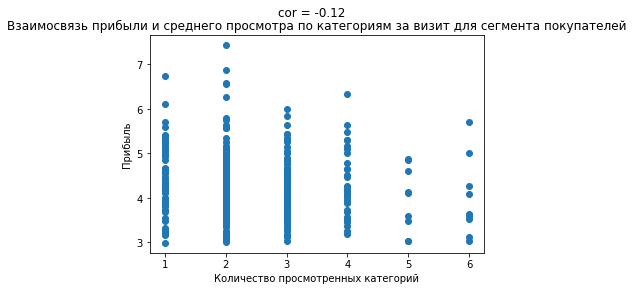

In [148]:
plt.title('Взаимосвязь прибыли и среднего просмотра по категориям за визит для сегмента покупателей')
plt.suptitle(f'cor = {market_segment["profit"].corr(market_segment["avg_cat_views_visit"]):.2f}')
plt.xlabel('Количество просмотренных категорий')
plt.ylabel('Прибыль')
plt.plot(market_segment['avg_cat_views_visit'], market_segment['profit'], 'o');

Мы видим совсем небольшую отрицательную взаимосвязь - наиболее высокоприбыльные покупатели рассматриваемых сегментов просматривают в среднем меньше категорий за визит. Посмотрим теперь на взаимосвязь количества неоплаченных покупок и прибыли: 

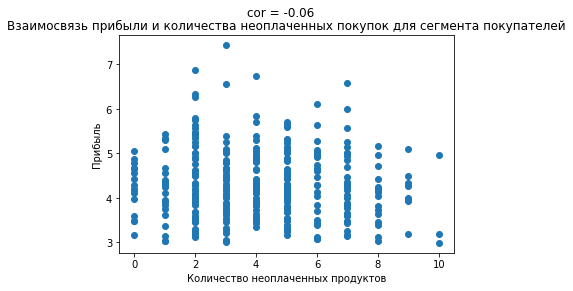

In [149]:
plt.title('Взаимосвязь прибыли и количества неоплаченных покупок для сегмента покупателей')
plt.suptitle(f'cor = {market_segment["profit"].corr(market_segment["unpaid_products"]):.2f}')
plt.xlabel('Количество неоплаченных продуктов')
plt.ylabel('Прибыль')
plt.plot(market_segment['unpaid_products'], market_segment['profit'], 'o');

И в этом случае также не видим взаимосвязей.

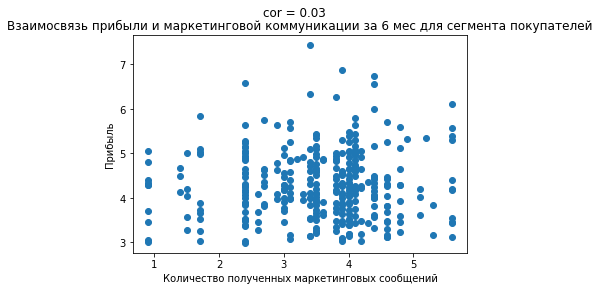

In [150]:
plt.title('Взаимосвязь прибыли и маркетинговой коммуникации за 6 мес для сегмента покупателей')
plt.suptitle(f'cor = {market_segment["profit"].corr(market_segment["market_commun_6"]):.2f}')
plt.xlabel('Количество полученных маркетинговых сообщений')
plt.ylabel('Прибыль')
plt.plot(market_segment['market_commun_6'], market_segment['profit'], 'o');

Для этой переменной также уровень взаимосвязи близок к 0. Посмотрим на взаимосвязи со всеми показателями выручки:

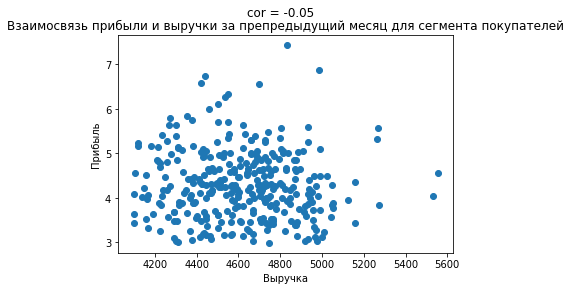

In [151]:
plt.title('Взаимосвязь прибыли и выручки за препредыдущий месяц для сегмента покупателей')
plt.suptitle(f'cor = {market_segment["profit"].corr(market_segment["revenue_prelast"]):.2f}')
plt.xlabel('Выручка')
plt.ylabel('Прибыль')
plt.plot(market_segment['revenue_prelast'], market_segment['profit'], 'o');

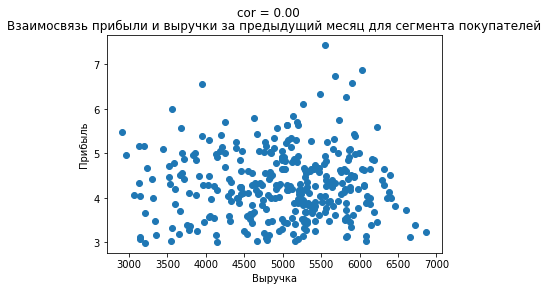

In [152]:
plt.title('Взаимосвязь прибыли и выручки за предыдущий месяц для сегмента покупателей')
plt.suptitle(f'cor = {market_segment["profit"].corr(market_segment["revenue_last"]):.2f}')
plt.xlabel('Выручка')
plt.ylabel('Прибыль')
plt.plot(market_segment['revenue_last'], market_segment['profit'], 'o');

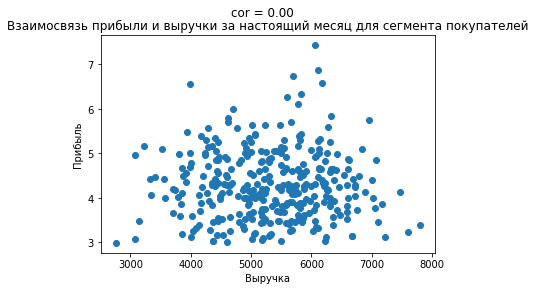

In [153]:
plt.title('Взаимосвязь прибыли и выручки за настоящий месяц для сегмента покупателей')
plt.suptitle(f'cor = {market_segment["profit"].corr(market_segment["revenue_current"]):.2f}')
plt.xlabel('Выручка')
plt.ylabel('Прибыль')
plt.plot(market_segment['revenue_current'], market_segment['profit'], 'o');

Здесь же мы так же не видим особенной взаимосвязь между прибылью и выручкой у покупателей сегмента с высокой прибылью и снижением активности.

Посмотрим на те категории товаров, которые приносят наибольшую прибыль в этом сегменте:

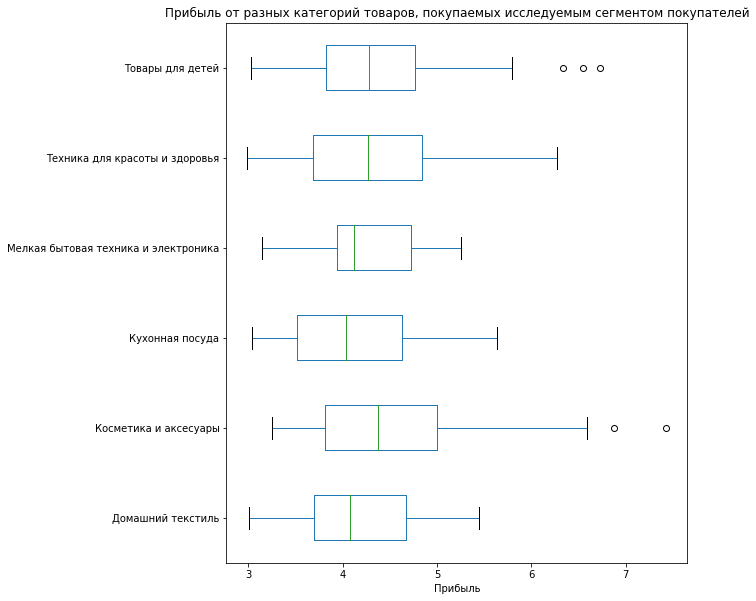

In [154]:
market_segment.boxplot(column='profit', by='pop_cat', grid=False, figsize=(8, 10), vert=False)
plt.title('Прибыль от разных категорий товаров, покупаемых исследуемым сегментом покупателей')
plt.suptitle('')
plt.ylabel('')
plt.xlabel('Прибыль')

plt.show()

По этому графику мы видим, что категории довольно близки по прибыли, но немного более прибыльными в среднем являются товары для детей, товары для красоты и здоровья, косметика и аксессуары. Вероятно, компании стоит сфокусироваться на персональных предложениях по этим категориям товаров, чтобы повысить покупательскую активность клиентов.

Также мы выявили особенности этого сегмента покупателей - эти покупатели проводят в среднем меньше времени на сайте, просматривают меньше страниц, а также чаще не продолжают покупку из корзины и дают меньше выручки. Однако работа по повышению покупательской способности тут может быть довольно сложная - вряд ли повышение маркетинговой активности приведет к повышению покупательской активности таких покупателей, т.к. по сути их интересуют в основном товары по акции.

## Общий вывод

Таким образом, мы провели исследование основных предикторов снижения покупательской активности клиентов онлайн-магазина, а также рассмотрели сегмент покупателей с высокой долей покупок товаров по акции. Для выполнения этих задач мы:
1. Проанализировали данные и выявили те признаки, которые в наибольшей степени связаны со снижением покупательской активности
2. Построили прогностическую модель прогноза снижения покупательской активности на основе данных признаков
3. Проанализировали объяснительную силу модели и выделили основные предикторы этой модели
4. Выделили сегмент покупателей и проанализировали особенности того, как у данной группы покупателей выражены выделенные признаки

На основе проведенного анализа можно сделать следующие выводы. Наиболее важными признаками для прогноза снижения покупательской активности являются в основном признаки поведения покупателя на сайте (и некоторые другие), например:
1. Количество страниц, которые покупатель посещает в среднем за визит - чем больше покупатель посещает страниц за визит, тем меньше вероятность снижения покупательской способности
2. Время, проведенное на сайте (при этом этот признак стабильно проявляется за разные периоды времени) - чем больше времени на сайте проводит покупатель, тем меньше вероятность снижения покупательской способности
3. Доля покупок, которые покупатель совершает по акциям - чем выше доля покупок по акции, тем выше вероятность снижения покупательской способности
4. Среднее количество категорий, которые покупатель просматривает за визит - чем больше просмотров категорий за визит, тем меньше вероятность снижения покупательской способности
5. Количество неоплаченных покупок в корзине - чем больше в корзине неоплаченных продуктов, тем выше вероятность снижения покупательской способности
6. Количество маркетинговой коммуникации между компанией и клиентом в среднем за 6 последних месяцев - чем больше маркетинговой коммуникации за последние полгода, тем меньше вероятность снижения покупательской способности
7. Выручка, полученная с покупателя за препредыдущий месяц - чем выше выручка с покупателя 2 месяца назад, тем меньше вероятность снижения покупательской способности. Интересно, что выручка за более недавние месяцы (предыдущий и текущий) практически не связана с покупательской активностью клиента.

Мы построили прогностическую модель, наилучшей моделью по результатам анализа оказался классификатор опорных векторов с ядром в виде радиальной базисной функции. Эта модель дала на тестовой выборке метрику F1 = 0.84, a ROC AUC = 0.864.

Также был проанализирован сегмент покупателей, которые покупают большинство товаров по акции, и выделены их особенности:
1. Они меньше времени проводят на сайте и просматривают меньше страниц
2. У них в среднем больше неоплаченных товаров в корзине.
3. С ними компания меньше проводит маркетинговой коммуникации
4. Выручка от них немного (в среднем на 200 руб. в месяц) меньше, чем от других покупателей.
5. Однако прибыль от них примерно такая же, как и от других покупателей.

Исходя из этого можно посоветовать:
1. Увеличить интенсивность долгосрочной маркетинговой коммуникации с такими клиентами, что, возможно, позволит повысить их уровень вовлеченности
2. Привлекать их внимание к акциям на, прежде всего, прибыльные категории товаров, такие как товары для детей, товары для красоты и здоровья, косметика и аксессуары
3. Повышать вовлеченность таких клиентов на сайте, пробовать заинтересовывать их предложениями, когда они находятся на сайте.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Николай, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='steelblue'>Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.

Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)

Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)</font>

<font color='blue'><b>Жду твой проект на повторном ревью. До встречи :) </b></font>